In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL
import pywt
import seaborn as sns

In [6]:
df = pd.read_csv("ALL.csv")
# print(df.head(5))
# select_col = ['BO1044_FLOW1', 'BO1044_FLOW2','BO1044_Pressure ','NB1013_FLOW1','NB1013_Pressure','NB1017_FLOW1','NB1017_FLOW2','NB1017_Pressure','NB1019_FLOW1','NB1019_Pressure','NB1020_FLOW1','NB1020_FLOW2']
# print(df[select_col].describe(),"\n")
print(df.describe())
# print(df.isnull().sum())
df_bo1013 = pd.read_csv("BO1013_Flow_Press.csv")
# print(df_bo1013.head(5))
print(df_bo1013['BO1013_FLOW1'])
print(df_bo1013['BO1013_FLOW1'].describe())
print(df_bo1013['BO1013_FLOW1'].unique())

       BO1013_FLOW1  BO1016_Pressure(m)  BO1017_Pressure(m)  BO1021_FLOW1)  \
count  10464.000000        10464.000000        10464.000000   10464.000000   
mean     897.105848           29.012682           25.593451    2236.229687   
std      221.774698            4.346007            3.086398     517.735759   
min       70.800000           -1.693000           13.120000      46.400000   
25%      686.000000           24.274750           22.748750    1843.400000   
50%      978.000000           31.115000           26.837000    2382.000000   
75%     1070.400000           32.329250           27.975000    2566.800000   
max     1240.400000           36.489000           32.228000    4124.000000   

       BO1021_Pressure  BO1022_flow1  BO1022_Pressure(m)  BO1017_FLOW1  \
count     10464.000000  10464.000000        10464.000000  10464.000000   
mean         12.960688    696.098203           23.868620   4602.711391   
std           0.213245    225.214997            2.508309    951.762711   
m

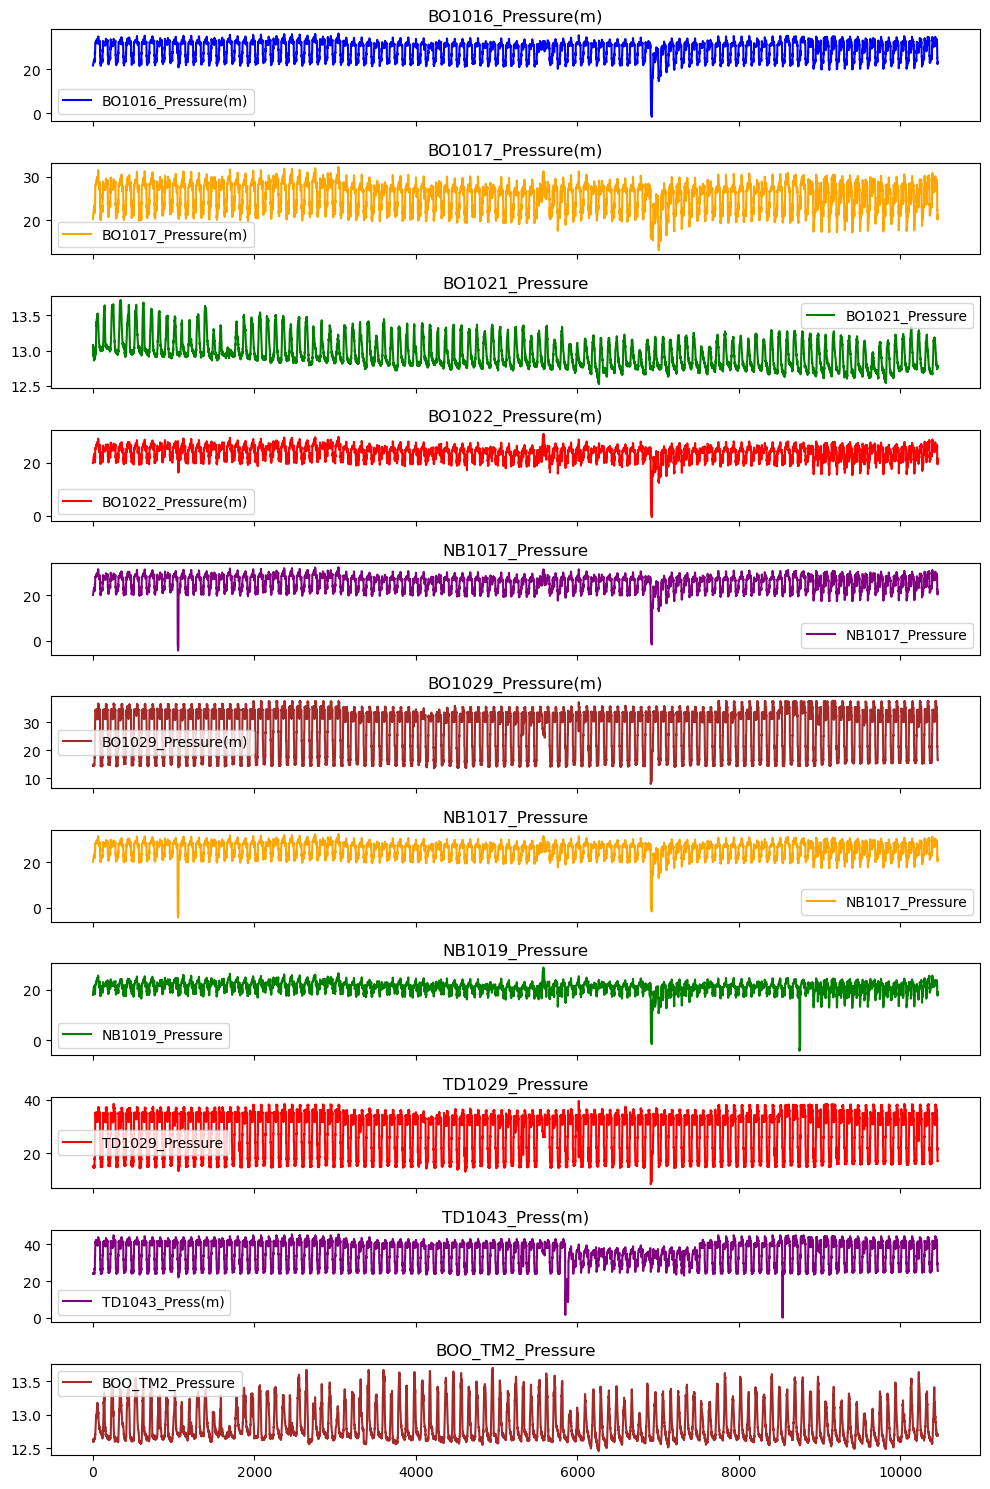

In [15]:
columns_to_plot = ['BO1016_Pressure(m)', 'BO1017_Pressure(m)', 'BO1021_Pressure','BO1022_Pressure(m)',
                    'NB1017_Pressure','BO1029_Pressure(m)','NB1017_Pressure','NB1019_Pressure','TD1029_Pressure'
                   ,'TD1043_Press(m)','BOO_TM2_Pressure']
# Set the figure size
# List of colors for each column
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown','orange', 'green', 'red', 'purple', 'brown']

# Set the figure size
fig, axs = plt.subplots(len(columns_to_plot), 1, figsize=(10, 15), sharex=True)

# Plot each column in a separate subplot with specified colors
for i, (col, color) in enumerate(zip(columns_to_plot, colors)):
    axs[i].plot(df.index, df[col], label=col, color=color)
    axs[i].set_title(col)
    axs[i].legend()

# Adjust the layout to prevent overlap
plt.tight_layout()
plt.show()

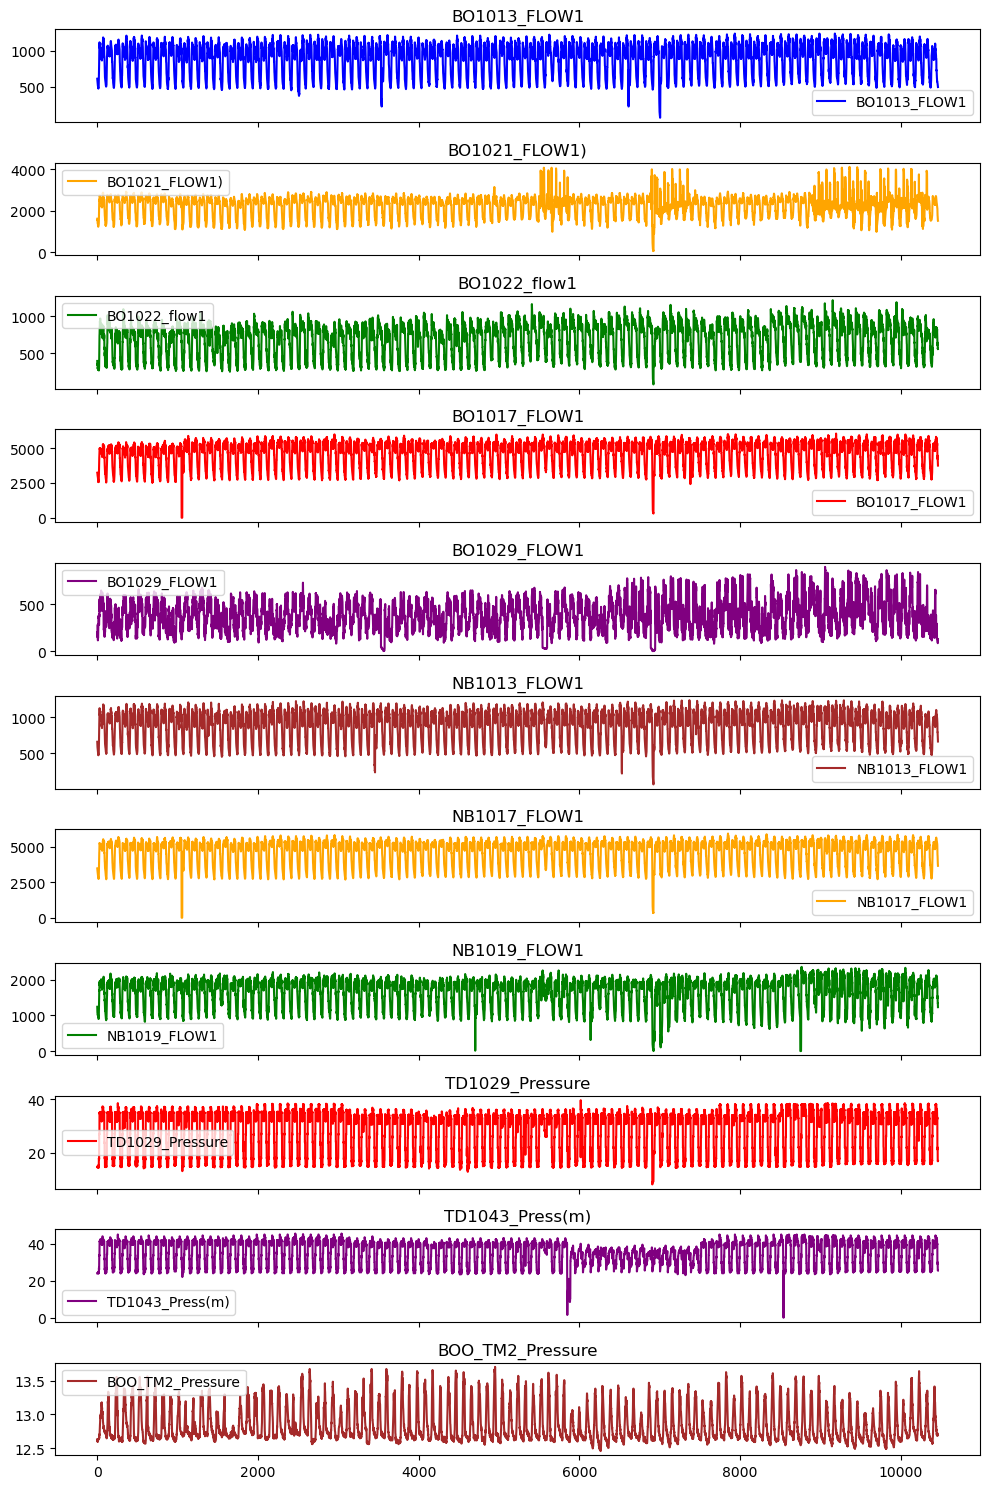

In [16]:
columns_to_plot = ['BO1013_FLOW1', 'BO1021_FLOW1)', 'BO1022_flow1','BO1017_FLOW1',
                    'BO1029_FLOW1','NB1013_FLOW1','NB1017_FLOW1','NB1019_FLOW1','TD1029_Pressure'
                   ,'TD1043_Press(m)','BOO_TM2_Pressure']
# Set the figure size
# List of colors for each column
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown','orange', 'green', 'red', 'purple', 'brown']

# Set the figure size
fig, axs = plt.subplots(len(columns_to_plot), 1, figsize=(10, 15), sharex=True)

# Plot each column in a separate subplot with specified colors
for i, (col, color) in enumerate(zip(columns_to_plot, colors)):
    axs[i].plot(df.index, df[col], label=col, color=color)
    axs[i].set_title(col)
    axs[i].legend()

# Adjust the layout to prevent overlap
plt.tight_layout()
plt.show()

<Axes: xlabel='Date_time'>

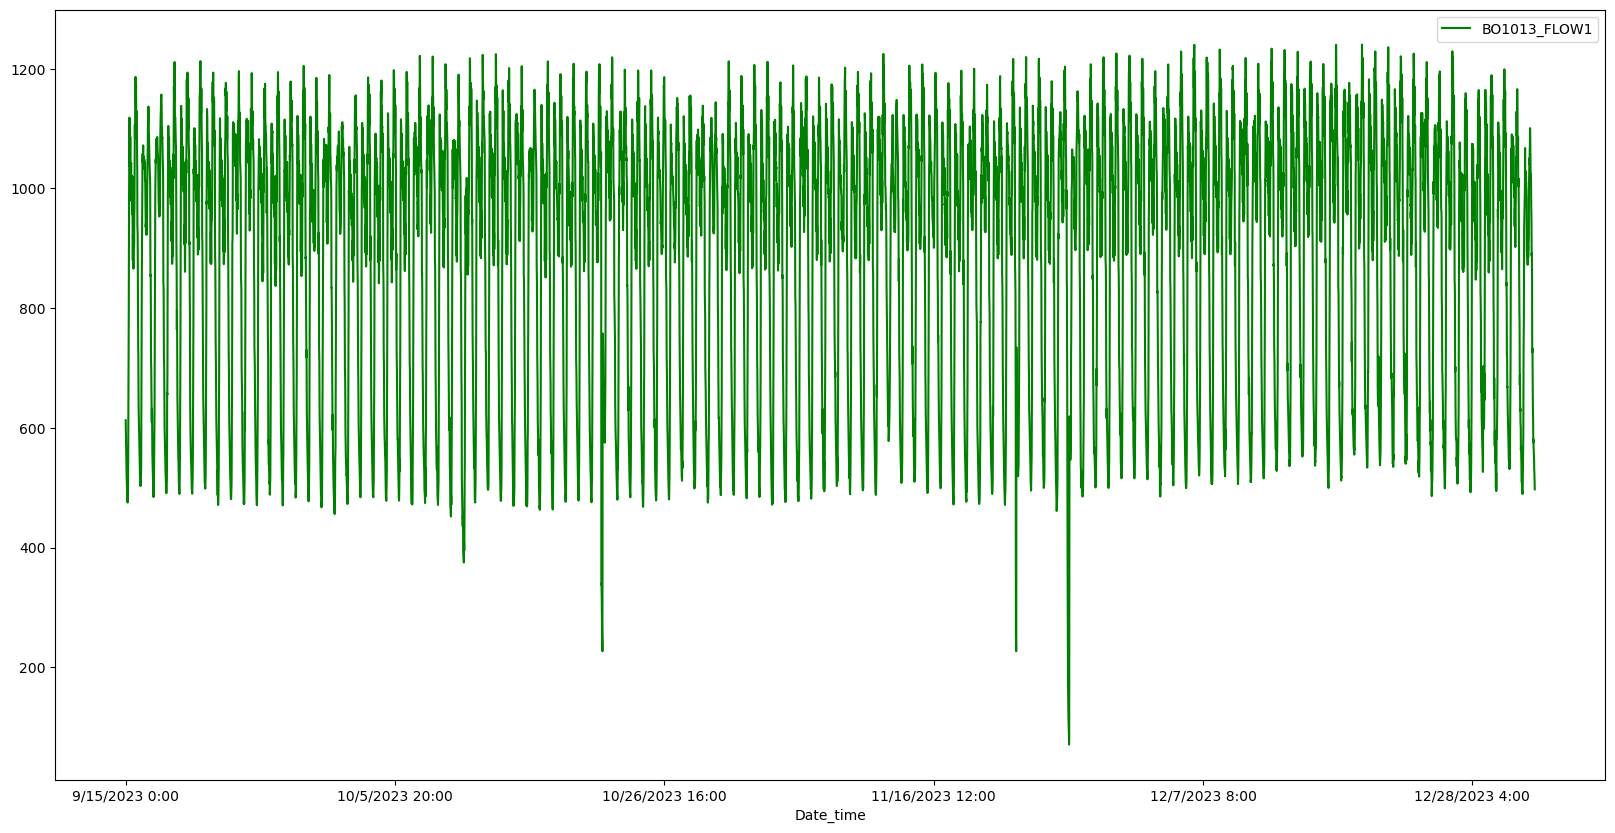

In [60]:
ax = plt.gca()

df.plot(kind='line',
        x='Date_time',
        y='BO1013_FLOW1',
        color='green', ax=ax, figsize = (20,10))


In [15]:
#chứa No data = object :v vcl, cần chuyển về NaN
df_bo1013['BO1013_FLOW1'] = pd.to_numeric(df_bo1013['BO1013_FLOW1'], errors = 'coerce')
print(df_bo1013['BO1013_FLOW1'].describe())
print(df_bo1013.isnull().sum())

count    10344.000000
mean       897.997834
std        221.119458
min         70.800000
25%        687.600000
50%        978.000000
75%       1070.400000
max       1240.400000
Name: BO1013_FLOW1, dtype: float64
Date_time              0
BO1013_FLOW1         120
BO1013_FLOW2           0
BO1013_Pressure    10464
dtype: int64


<Axes: xlabel='Date_time'>

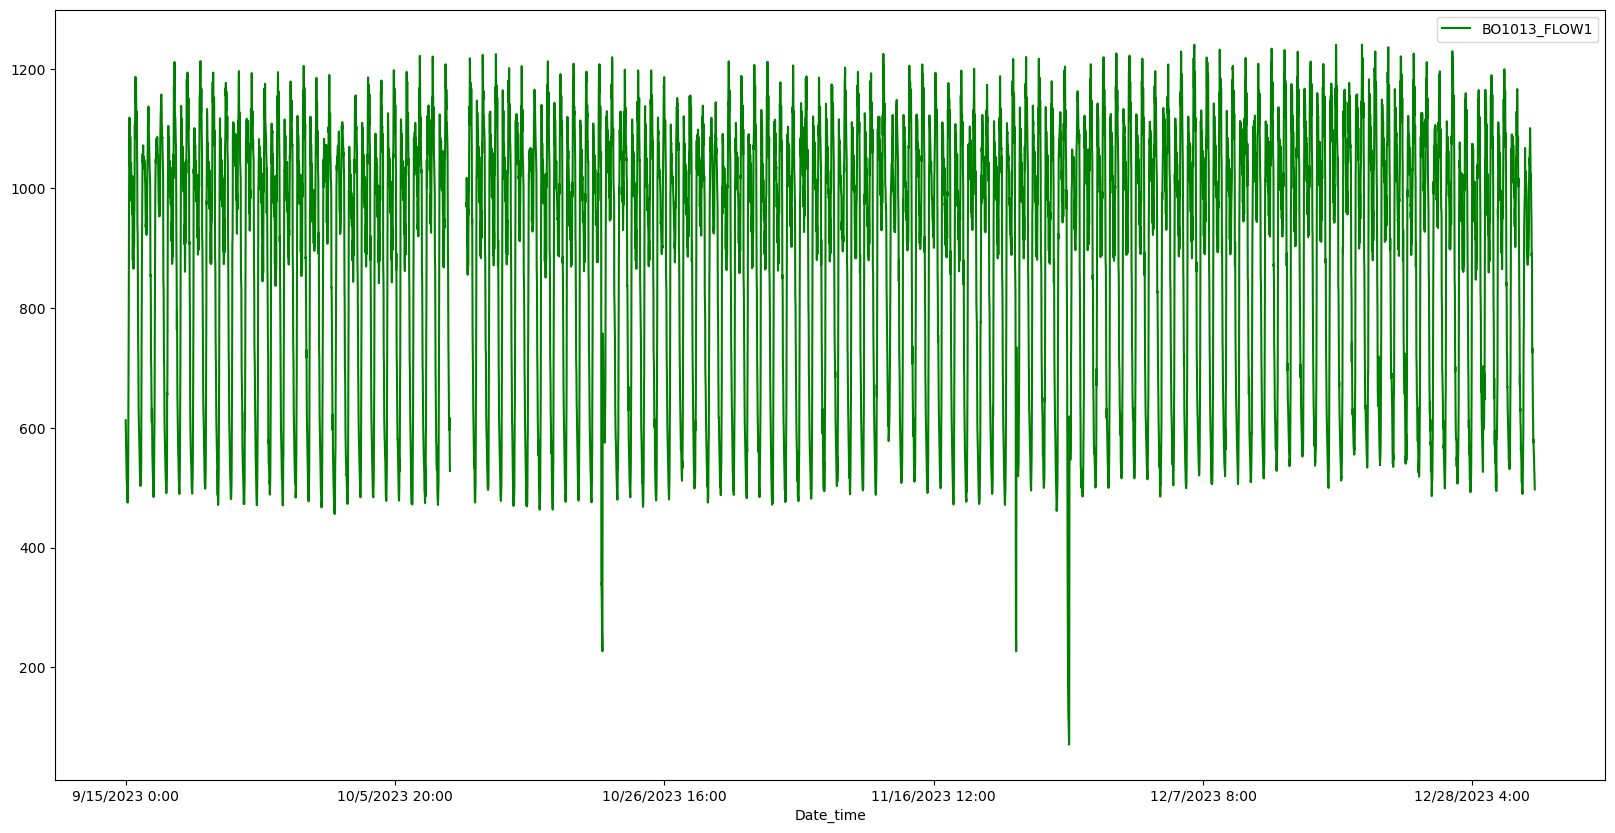

In [16]:
ax = plt.gca()

df_bo1013.plot(kind='line',
        x='Date_time',
        y='BO1013_FLOW1',
        color='green', ax=ax, figsize = (20,10))



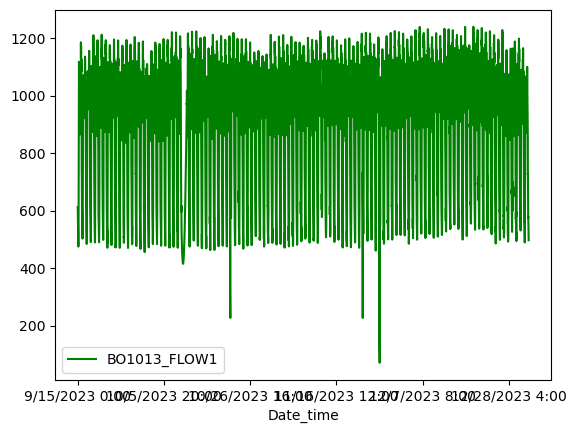

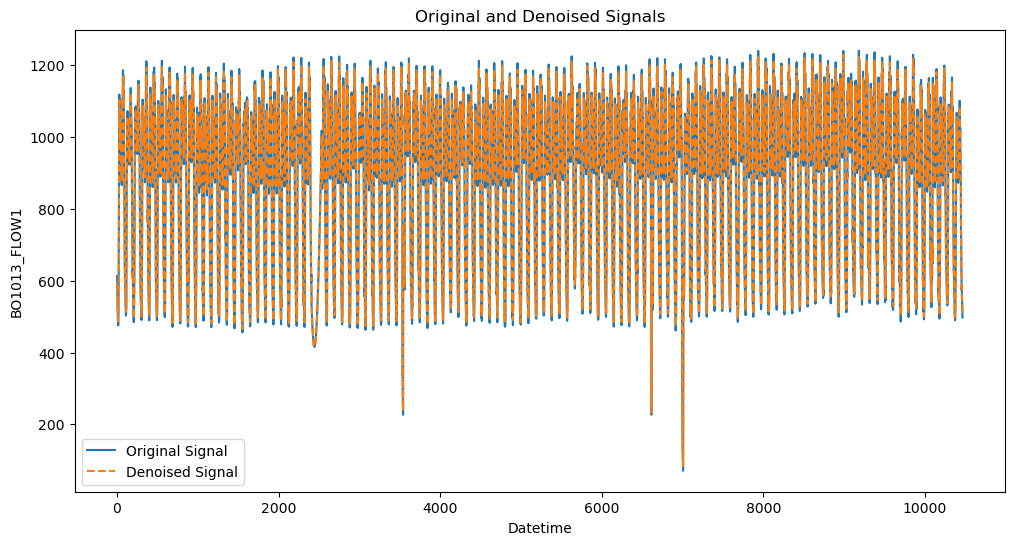

In [17]:
# Thử với nội suy
df_bo1013['BO1013_FLOW1'] = df_bo1013['BO1013_FLOW1'].interpolate(method='polynomial', order = 3)
# Thử với fill back
#df_bo1013['BO1013_FLOW1'] = df_bo1013['BO1013_FLOW1'].fillna(value=None, method='backfill', axis=None, downcast=None).plot(figsize = (16,6))
ax = plt.gca()

df_bo1013.plot(kind='line',
        x='Date_time',
        y='BO1013_FLOW1',
        color='green', ax=ax)
plt.plot()
coeffs = pywt.wavedec(df_bo1013['BO1013_FLOW1'], 'db1', level=4)
coeffs[1:] = (pywt.threshold(i, value=10, mode='soft') for i in coeffs[1:])
reconstructed_signal = pywt.waverec(coeffs, 'db1')

# Add denoised signal to DataFrame
df_bo1013['denoised_value'] = reconstructed_signal

# Plotting the original and denoised signals
plt.figure(figsize=(12, 6))
plt.plot(df.index,df_bo1013['BO1013_FLOW1'], label='Original Signal')
plt.plot(df.index,df_bo1013['denoised_value'], label='Denoised Signal', linestyle='--')
plt.legend()
plt.xlabel('Datetime')
plt.ylabel('BO1013_FLOW1')
plt.title('Original and Denoised Signals')
plt.show()

In [18]:
df_bo1016_bo1017 = pd.read_csv("bo1016_bo1017.csv")
print(df_bo1016_bo1017.describe())
print(df_bo1016_bo1017.isnull().sum())
print(df_bo1016_bo1017[df_bo1016_bo1017['BO1016_Pressure(m)']<=0])
#press không thể có giá trị âm, cần thay thế

       BO1016_Pressure(m)  BO1017_FLOW1
count        10464.000000  10464.000000
mean            29.012682   4602.711391
std              4.346007    951.762711
min             -1.693000      0.000000
25%             24.274750   3752.000000
50%             31.115000   4972.000000
75%             32.329250   5332.000000
max             36.489000   6044.000000
Date_time             0
BO1016_Pressure(m)    0
BO1017_FLOW1          0
dtype: int64
            Date_time  BO1016_Pressure(m)  BO1017_FLOW1
6914  11/26/2023 0:30              -0.518           556
6915  11/26/2023 0:45              -0.862           452
6916  11/26/2023 1:00              -1.037           424
6917  11/26/2023 1:15              -1.175           364
6918  11/26/2023 1:30              -1.331           356
6919  11/26/2023 1:45              -1.458           376
6920  11/26/2023 2:00              -1.575           344
6921  11/26/2023 2:15              -1.693           304
6922  11/26/2023 2:30              -1.579          

<Axes: xlabel='Date_time'>

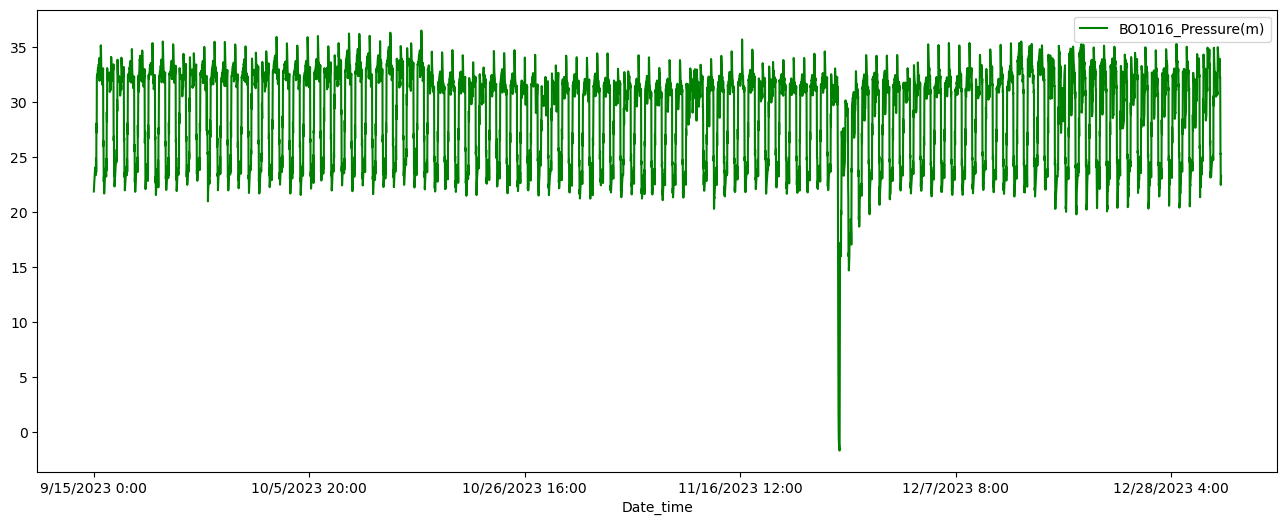

In [19]:
ax = plt.gca()
df_bo1016_bo1017.plot(kind='line',
        x='Date_time',
        y='BO1016_Pressure(m)',
        color='green', ax=ax, figsize = (16,6))
#dữ liệu press này đã vá lại (dữ liệu ban đầu mang giá trị âm , giảm bất thường)

            Date_time  BO1016_Pressure(m)  BO1017_FLOW1
1050  9/25/2023 22:30              31.790             0
1051  9/25/2023 22:45              30.048             0
1052  9/25/2023 23:00              27.047             0
1053  9/25/2023 23:15              27.259             0
1054  9/25/2023 23:30              27.421             0
1055  9/25/2023 23:45              26.074             0
1056   9/26/2023 0:00              25.255             0
1057   9/26/2023 0:15              25.419             0


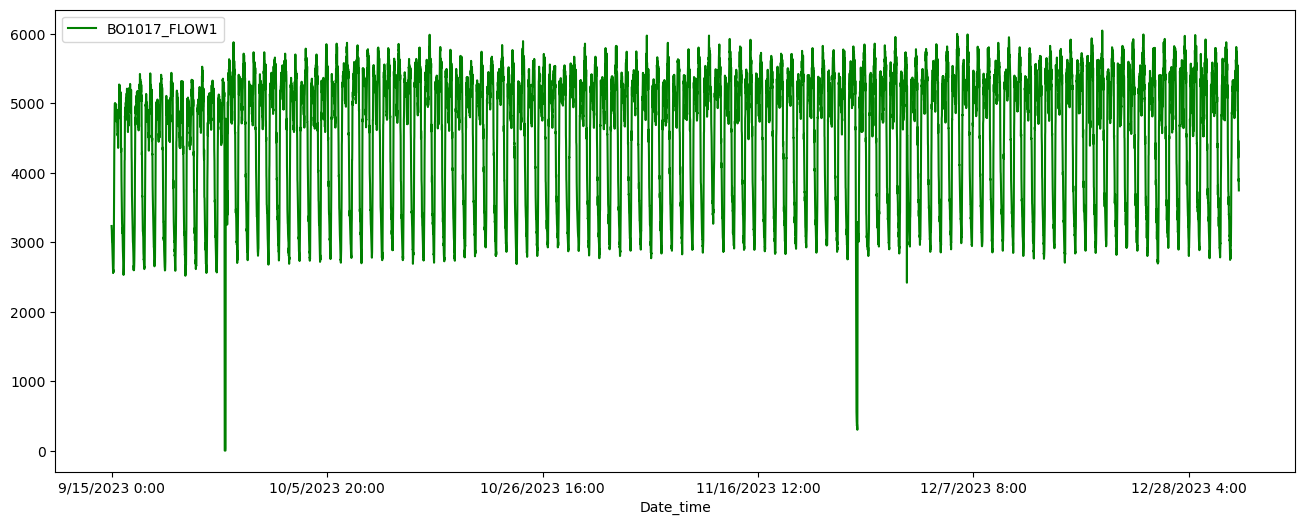

In [20]:
ax = plt.gca()
df_bo1016_bo1017.plot(kind='line',
        x='Date_time',
        y='BO1017_FLOW1',
        color='green', ax=ax, figsize = (16,6))
print(df_bo1016_bo1017[df_bo1016_bo1017['BO1017_FLOW1']<=0])
#giá trị 0 này được coi là bất thường, có thể thu thập không cần thay thế!!!

In [21]:
df_bo1017press_bo1022 = pd.read_csv("bo1017press_bo1022.csv")
# df_bo1017press_bo1022= df_bo1017press_bo1022.drop(['BO1021_FLOW1)', 'BO1021_Pressure'], axis = 1)
print(df_bo1017press_bo1022.head())

        Date_time  BO1017_Pressure(m)  BO1021_FLOW1)  BO1021_Pressure  \
0  9/15/2023 0:00              20.275        1613.08           13.078   
1  9/15/2023 0:15              20.556        1540.28           13.038   
2  9/15/2023 0:30              20.816        1558.08           13.039   
3  9/15/2023 0:45              21.028        1549.68           13.062   
4  9/15/2023 1:00              21.274        1442.48           13.023   

   BO1022_flow1  BO1022_Pressure(m)  Unnamed: 6  Unnamed: 7  Unnamed: 8  \
0         398.4              19.898         NaN         NaN         NaN   
1         341.2              20.008         NaN         NaN         NaN   
2         344.4              20.462         NaN         NaN         NaN   
3         354.4              20.642         NaN         NaN         NaN   
4         362.8              20.877         NaN         NaN         NaN   

   Unnamed: 9  Unnamed: 10  Unnamed: 11  Unnamed: 12  Unnamed: 13  \
0         NaN          NaN          NaN  

In [22]:
print(df_bo1017press_bo1022.describe())
print(df_bo1017press_bo1022.isnull().sum())

       BO1017_Pressure(m)  BO1021_FLOW1)  BO1021_Pressure  BO1022_flow1  \
count        10464.000000   10464.000000     10464.000000  10464.000000   
mean            25.593451    2236.229687        12.960688    696.098203   
std              3.086398     517.735759         0.213245    225.214997   
min             13.120000      46.400000        12.529000     82.000000   
25%             22.748750    1843.400000        12.796000    478.000000   
50%             26.837000    2382.000000        12.921000    772.400000   
75%             27.975000    2566.800000        13.093000    869.600000   
max             32.228000    4124.000000        13.712000   1218.000000   

       BO1022_Pressure(m)  Unnamed: 6  Unnamed: 7  Unnamed: 8  Unnamed: 9  \
count        10464.000000         0.0         0.0         0.0         0.0   
mean            23.868620         NaN         NaN         NaN         NaN   
std              2.508309         NaN         NaN         NaN         NaN   
min             

Empty DataFrame
Columns: [Date_time, BO1017_Pressure(m), BO1021_FLOW1), BO1021_Pressure, BO1022_flow1, BO1022_Pressure(m), Unnamed: 6, Unnamed: 7, Unnamed: 8, Unnamed: 9, Unnamed: 10, Unnamed: 11, Unnamed: 12, Unnamed: 13, Unnamed: 14, Unnamed: 15, Unnamed: 16, Unnamed: 17]
Index: []


<Axes: xlabel='Date_time'>

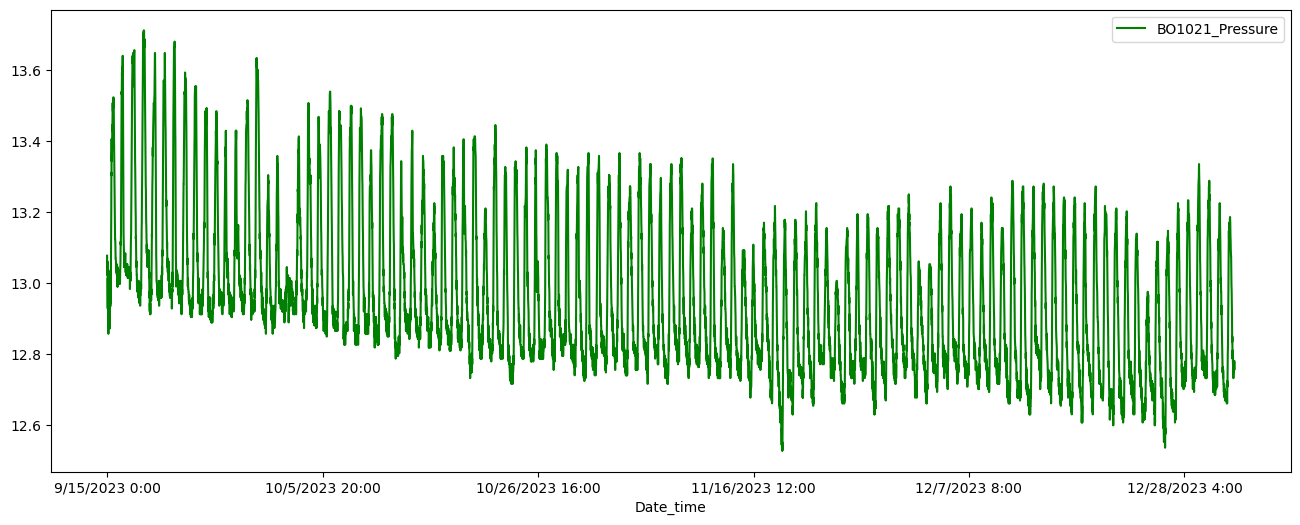

In [23]:
print(df_bo1017press_bo1022[df_bo1017press_bo1022['BO1017_Pressure(m)']<=0])
ax = plt.gca()
df_bo1017press_bo1022.plot(kind='line',
        x='Date_time',
        y='BO1021_Pressure',
        color='green', ax=ax, figsize = (16,6))

<Axes: xlabel='Date_time'>

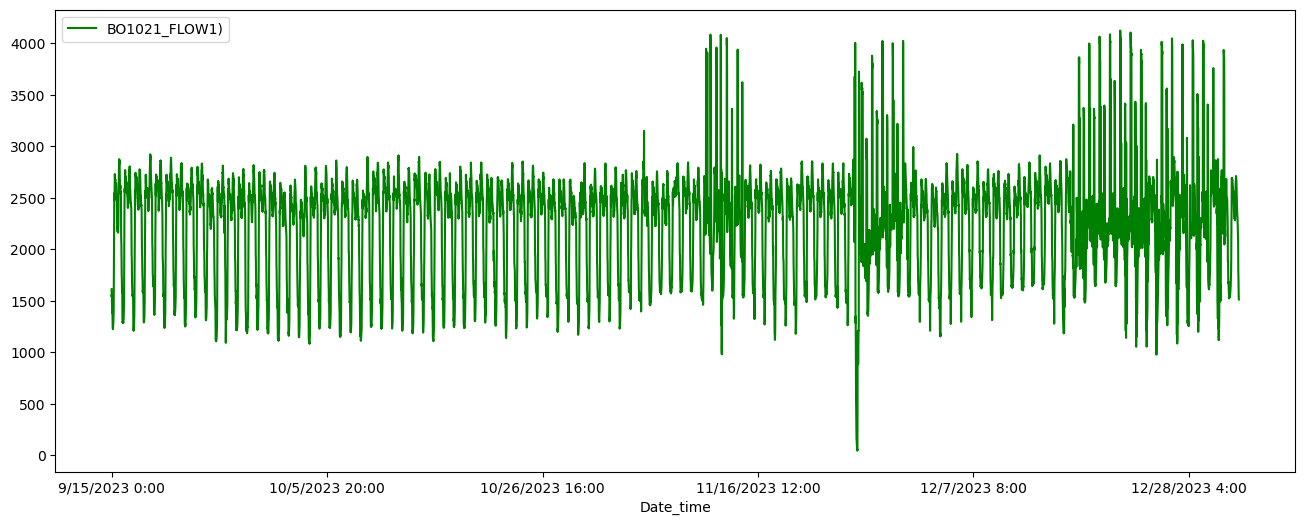

In [24]:
ax = plt.gca()
df_bo1017press_bo1022.plot(kind='line',
        x='Date_time',
        y='BO1021_FLOW1)',
        color='green', ax=ax, figsize = (16,6))
# print(df_bo1017press_bo1022[df_bo1017press_bo1022['BO1021_FLOW1)']<=500])
# hmm... có vẻ ổn, có bất thường nhưng có thể coi là bất thường bún riu :v

Empty DataFrame
Columns: [Date_time, BO1017_Pressure(m), BO1021_FLOW1), BO1021_Pressure, BO1022_flow1, BO1022_Pressure(m), Unnamed: 6, Unnamed: 7, Unnamed: 8, Unnamed: 9, Unnamed: 10, Unnamed: 11, Unnamed: 12, Unnamed: 13, Unnamed: 14, Unnamed: 15, Unnamed: 16, Unnamed: 17]
Index: []


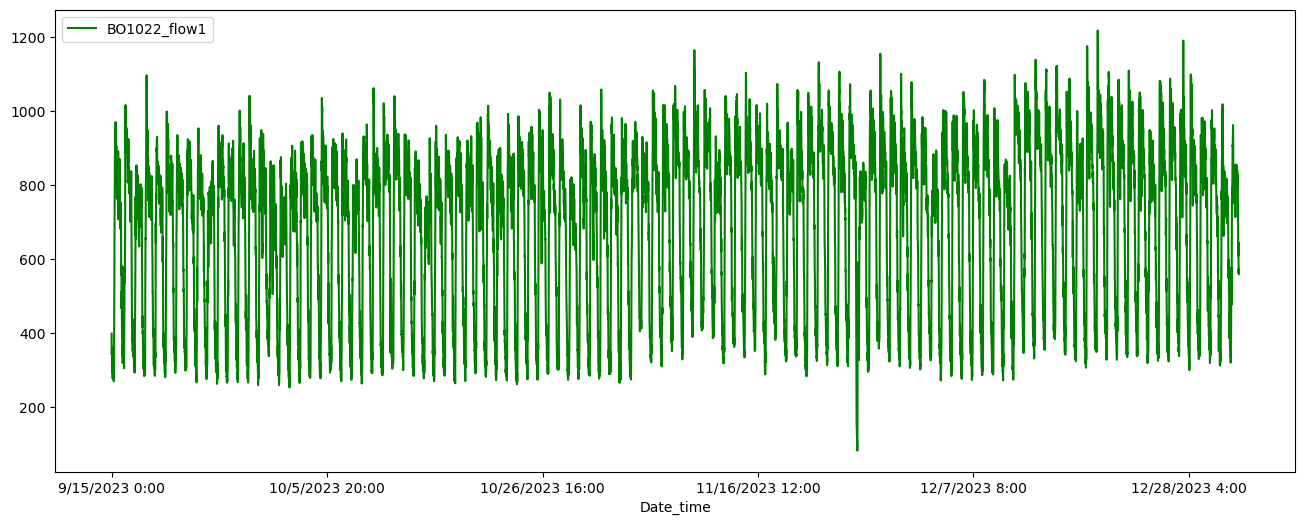

In [25]:
ax = plt.gca()
df_bo1017press_bo1022.plot(kind='line',
        x='Date_time',
        y='BO1022_flow1',
        color='green', ax=ax, figsize = (16,6))
print(df_bo1017press_bo1022[df_bo1017press_bo1022['BO1022_flow1']<=0])
# ok, có vẻ 1022_flow ổn  , ko sửa gì nữa

            Date_time  BO1017_Pressure(m)  BO1021_FLOW1)  BO1021_Pressure  \
6917  11/26/2023 1:15           18.115875          113.2           12.780   
6918  11/26/2023 1:30           18.329750           90.0           12.780   
6919  11/26/2023 1:45           18.551750           90.0           12.780   
6920  11/26/2023 2:00           18.724875           51.2           12.780   
6921  11/26/2023 2:15           18.877250           60.4           12.756   
6922  11/26/2023 2:30           19.062125           46.4           12.780   
6923  11/26/2023 2:45           19.248000          125.6           12.749   

      BO1022_flow1  BO1022_Pressure(m)  Unnamed: 6  Unnamed: 7  Unnamed: 8  \
6917         132.4              -0.039         NaN         NaN         NaN   
6918         122.4              -0.172         NaN         NaN         NaN   
6919         112.8              -0.313         NaN         NaN         NaN   
6920         101.2              -0.423         NaN         NaN         

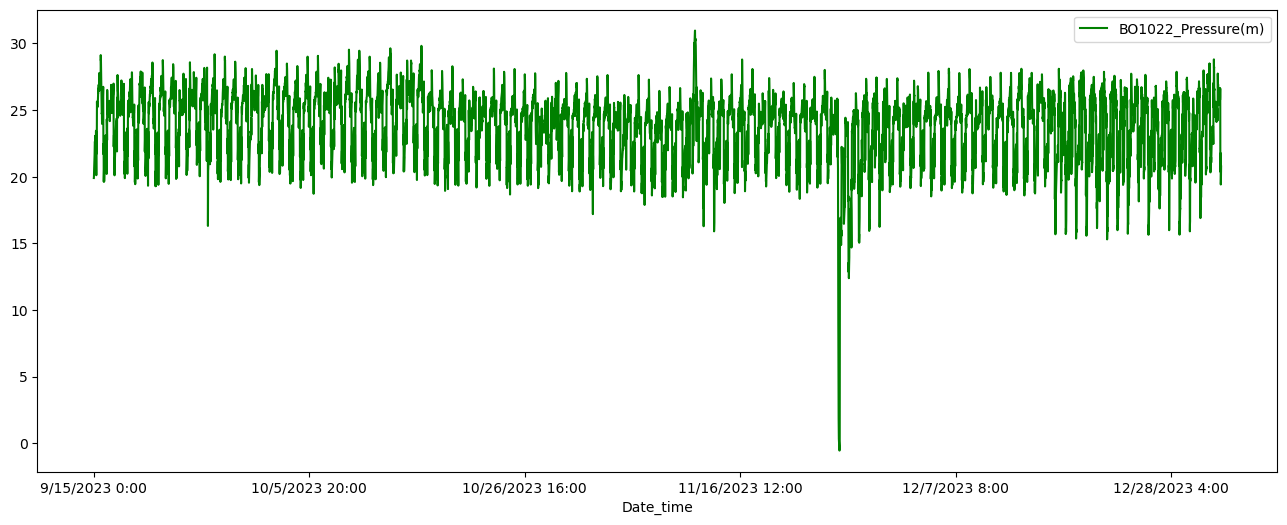

In [26]:
ax = plt.gca()
df_bo1017press_bo1022.plot(kind='line',
        x='Date_time',
        y='BO1022_Pressure(m)',
        color='green', ax=ax, figsize = (16,6))
print(df_bo1017press_bo1022[df_bo1017press_bo1022['BO1022_Pressure(m)']<=0])

In [4]:
df_bo1019_nb1013 = pd.read_csv("bo1029-nb1013.csv")
print(df_bo1019_nb1013.head())
print(df_bo1019_nb1013.describe())

        Date_time  BO1029_FLOW1  BO1029_FLOW2  BO1029_Pressure(m)  \
0  9/15/2023 0:00         201.6           0.0              14.486   
1  9/15/2023 0:15         175.2           0.0              14.812   
2  9/15/2023 0:30         175.6           0.0              14.522   
3  9/15/2023 0:45         152.0           0.0              14.546   
4  9/15/2023 1:00         144.0           0.0              14.501   

   BO1044_FLOW1  BO1044_FLOW2  BO1044_Pressure   NB1013_FLOW1  NB1013_FLOW2  \
0           0.0           0.0              -0.5         657.6             0   
1           0.0           0.0              -0.5         614.0             0   
2           0.0           0.0              -0.5         586.8             0   
3           0.0           0.0              -0.5         582.4             0   
4           0.0           0.0              -0.5         568.4             0   

   NB1013_Pressure  
0           -0.094  
1           -0.117  
2           -0.094  
3           -0.117  
4    

C:\Users\ainzo\AppData\Local\Temp\ipykernel_15764\3280110952.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_bo1019_nb1013.corr()


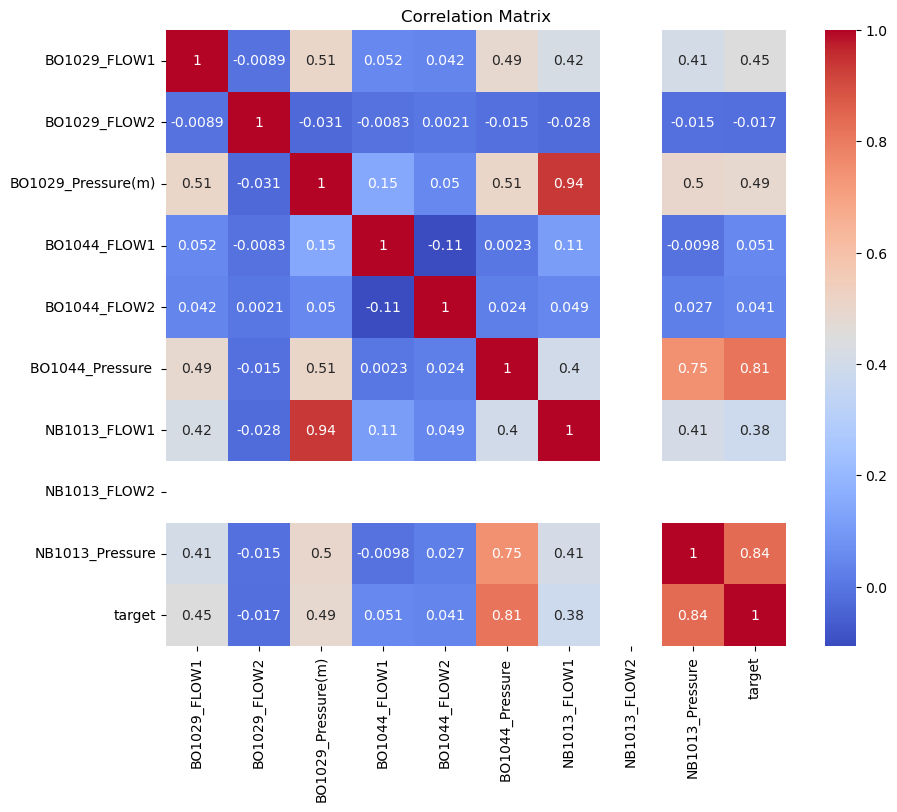

'# Hệ số tương quan Pearson: Giá trị nằm trong khoảng từ -1 đến 1.\n# 1 chỉ ra mối tương quan dương hoàn hảo.\n# -1 chỉ ra mối tương quan âm hoàn hảo.\n# 0 chỉ ra không có mối tương quan.\n# Đặc trưng quan trọng: Những đặc trưng có hệ số tương quan gần với 1 hoặc -1 thường được coi là quan trọng đối với biến mục tiêu.'

In [7]:
# Tính toán hệ số tương quan
df_bo1019_nb1013['target'] = df['BOO_TM2_Pressure']
correlation_matrix = df_bo1019_nb1013.corr()

# Hiển thị ma trận tương quan
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.savefig('correlation_matrix.png')
plt.show()
'''# Hệ số tương quan Pearson: Giá trị nằm trong khoảng từ -1 đến 1.
# 1 chỉ ra mối tương quan dương hoàn hảo.
# -1 chỉ ra mối tương quan âm hoàn hảo.
# 0 chỉ ra không có mối tương quan.
# Đặc trưng quan trọng: Những đặc trưng có hệ số tương quan gần với 1 hoặc -1 thường được coi là quan trọng đối với biến mục tiêu.'''

In [29]:
target_correlation = correlation_matrix['target'].drop('target').sort_values(ascending=False)
print(target_correlation)
'''bo1044_flow1, bo1044_flow2, bo1029_flow2 có độ lớn correlation <0.3 => loại'''
'''nb1013 NaN loại'''

NB1013_Pressure       0.838269
BO1044_Pressure       0.814210
BO1029_Pressure(m)    0.488761
BO1029_FLOW1          0.447289
NB1013_FLOW1          0.382582
BO1044_FLOW1          0.051028
BO1044_FLOW2          0.040661
BO1029_FLOW2         -0.017044
NB1013_FLOW2               NaN
Name: target, dtype: float64


'nb1013 NaN loại'

In [30]:
df_bo1019_nb1013 = df_bo1019_nb1013.drop(['BO1044_FLOW1','BO1044_FLOW2','BO1029_FLOW2','NB1013_FLOW2'], axis = 1)
print(df_bo1019_nb1013.describe())

       BO1029_FLOW1  BO1029_Pressure(m)  BO1044_Pressure   NB1013_FLOW1  \
count  10464.000000        10464.000000      10464.000000  10464.000000   
mean     374.846713           27.558013         -0.317231    890.216055   
std      166.142653            8.380472          0.242286    219.846552   
min        0.000000            7.897000         -0.500000     59.600000   
25%      248.800000           16.602250         -0.500000    682.000000   
50%      364.000000           31.429000         -0.500000    969.200000   
75%      488.800000           34.313000          0.000000   1061.600000   
max      899.600000           37.749000          0.500000   1240.800000   

       NB1013_Pressure        target  
count     10464.000000  10464.000000  
mean          0.088978     12.846637  
std           0.154918      0.261680  
min          -0.188000     12.459000  
25%          -0.031000     12.655000  
50%           0.047000     12.733000  
75%           0.188000     12.999000  
max         

             Date_time  BO1029_FLOW1  BO1029_Pressure(m)  BO1044_Pressure   \
3564   10/22/2023 3:00           0.0              14.614              -0.5   
6909  11/25/2023 23:15           0.0               8.164              -0.5   
6911  11/25/2023 23:45           0.0               8.662              -0.5   
6913   11/26/2023 0:15           0.0               8.881              -0.5   
6914   11/26/2023 0:30           0.0               8.939              -0.5   
6915   11/26/2023 0:45           0.0               8.923              -0.5   
6916   11/26/2023 1:00           0.0               8.913              -0.5   
6917   11/26/2023 1:15           0.0               8.900              -0.5   
6918   11/26/2023 1:30           0.0               8.908              -0.5   
6919   11/26/2023 1:45           0.0               8.897              -0.5   
6920   11/26/2023 2:00           0.0               8.915              -0.5   
6921   11/26/2023 2:15           0.0               8.866        

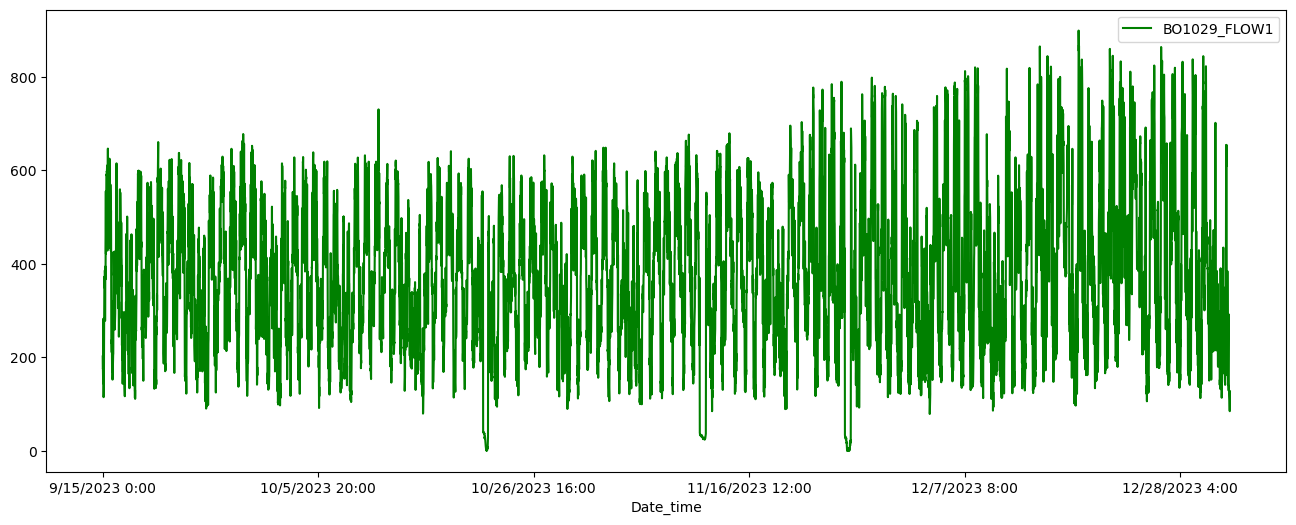

In [31]:
ax = plt.gca()
df_bo1019_nb1013.plot(kind='line',
        x='Date_time',
        y='BO1029_FLOW1',
        color='green', ax=ax, figsize = (16,6))
print(df_bo1019_nb1013[df_bo1019_nb1013['BO1029_FLOW1']<=0])
# ok, có vẻ 1029_flow ổn  , ko sửa gì nữa

Empty DataFrame
Columns: [Date_time, BO1029_FLOW1, BO1029_Pressure(m), BO1044_Pressure , NB1013_FLOW1, NB1013_Pressure, target]
Index: []


'có bất thường nhưng không có giá trị <=0 chắc ok :/'

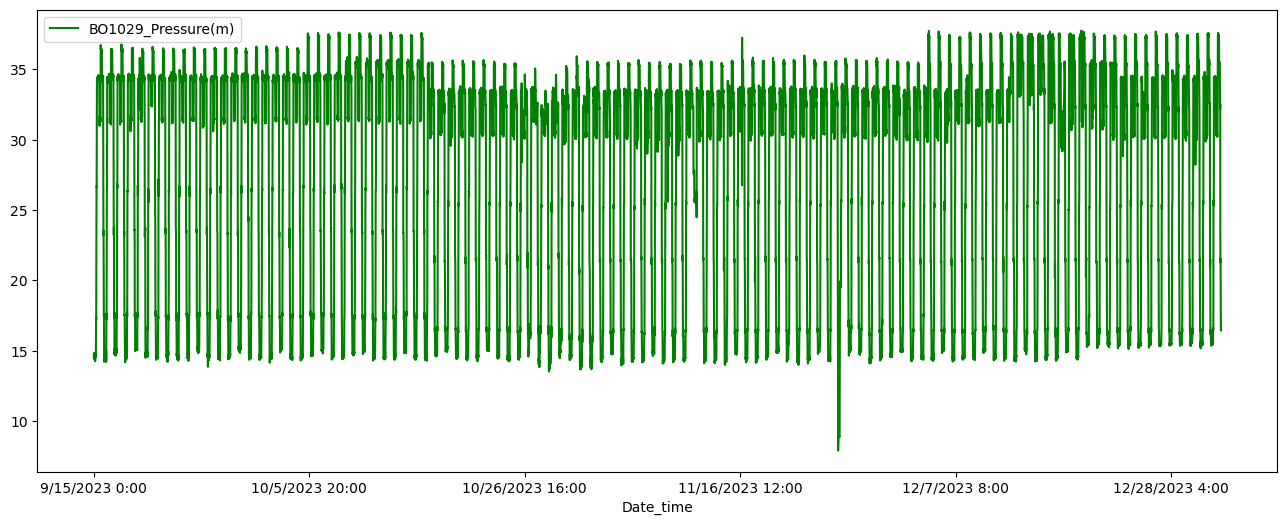

In [32]:
ax = plt.gca()
df_bo1019_nb1013.plot(kind='line',
        x='Date_time',
        y='BO1029_Pressure(m)',
        color='green', ax=ax, figsize = (16,6))
print(df_bo1019_nb1013[df_bo1019_nb1013['BO1029_Pressure(m)']<=0])
'''có bất thường nhưng không có giá trị <=0 chắc ok :/'''

'Nhận xét: có vẻ BO1044 có vấn đề, trong lịch sử hiện tại bo1044 hiện không gửi thông tin về, correc \ncó sự thay đổi ảnh hưởng tới target nhưng áp suất có thay dổi theo dao động vuông và âm -> bất thường\nlực chọn drop BO1044_Pressure'

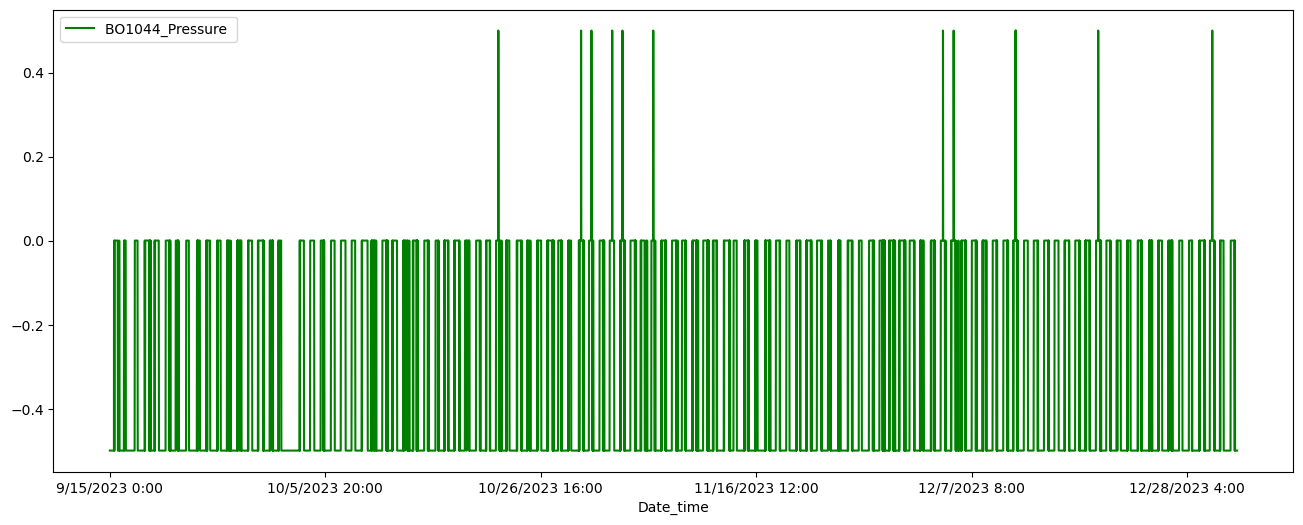

In [33]:
df_bo1019_nb1013["BO1044_Pressure "].describe()
ax = plt.gca()
df_bo1019_nb1013.plot(kind='line',
        x='Date_time',
        y='BO1044_Pressure ',
        color='green', ax=ax, figsize = (16,6))
'''Nhận xét: có vẻ BO1044 có vấn đề, trong lịch sử hiện tại bo1044 hiện không gửi thông tin về, correc 
có sự thay đổi ảnh hưởng tới target nhưng áp suất có thay dổi theo dao động vuông và âm -> bất thường
lực chọn drop BO1044_Pressure'''

Empty DataFrame
Columns: [Date_time, BO1029_FLOW1, BO1029_Pressure(m), BO1044_Pressure , NB1013_FLOW1, NB1013_Pressure, target]
Index: []


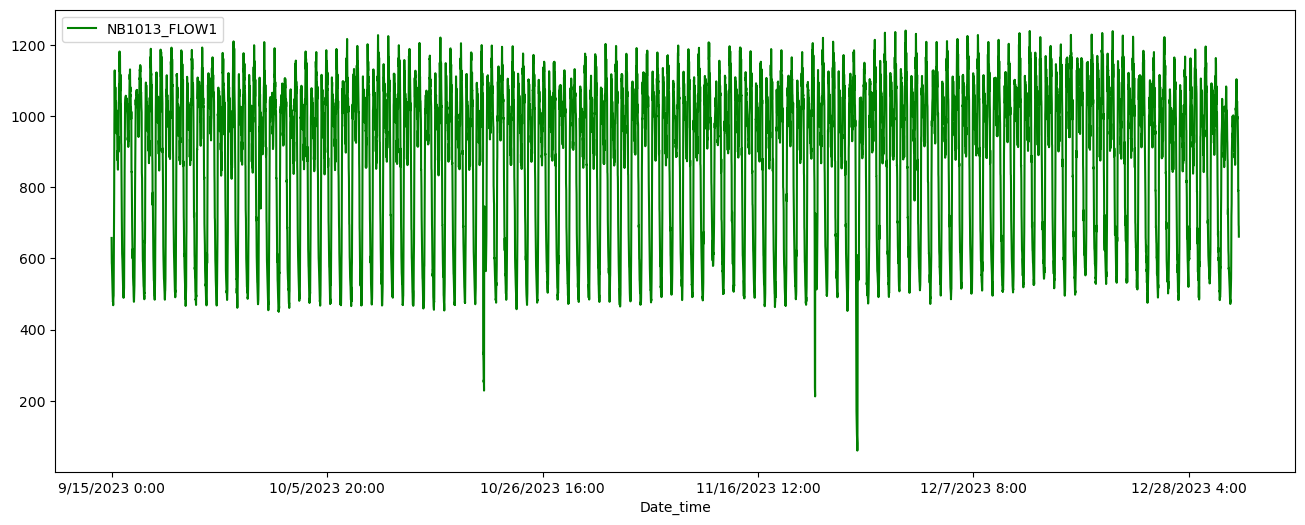

In [34]:
ax = plt.gca()
df_bo1019_nb1013.plot(kind='line',
        x='Date_time',
        y='NB1013_FLOW1',
        color='green', ax=ax, figsize = (16,6))
print(df_bo1019_nb1013[df_bo1019_nb1013['NB1013_FLOW1']<=0])
# có vẻ ổn , có bất thường nhưng ko âm, có thể chấp nhận

'Nhận xét: số liệu press ở nb1029 có bất thường, số lượng giá trị âm chiếm khá nhiều, khoảng giao động\nrất nhỏ quanh giá trị 0: -0.2-> 0.5_6; thời điểm hiện tại nb1029 không còn nhận dữ liệu => drop!'

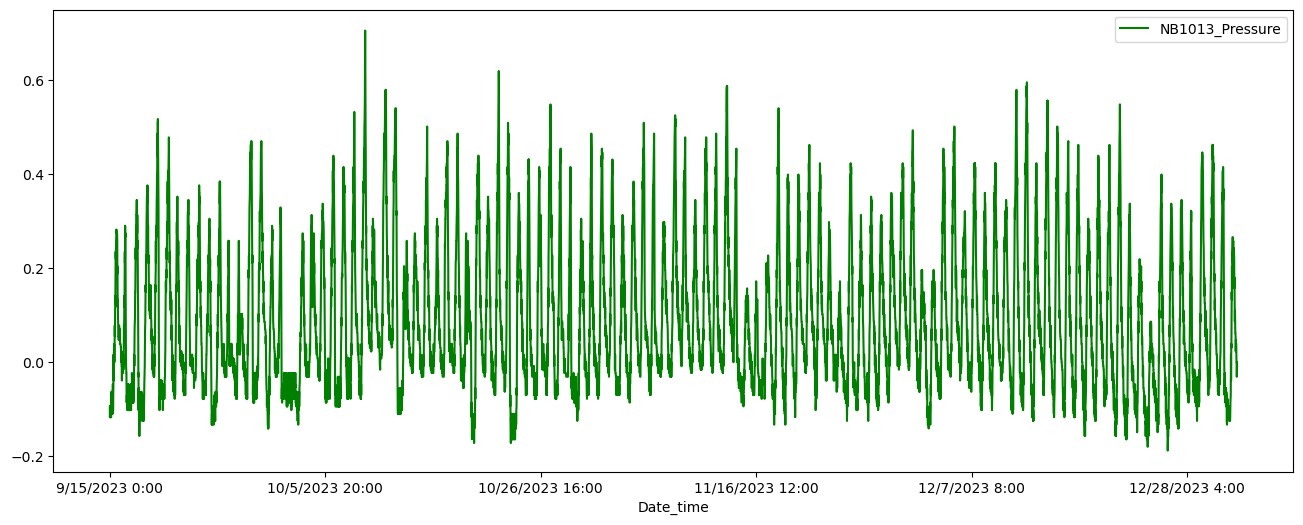

In [35]:
ax = plt.gca()
df_bo1019_nb1013.plot(kind='line',
        x='Date_time',
        y='NB1013_Pressure',
        color='green', ax=ax, figsize = (16,6))
# print(df_bo1019_nb1013[df_bo1019_nb1013['NB1013_Pressure']<=0])
'''Nhận xét: số liệu press ở nb1029 có bất thường, số lượng giá trị âm chiếm khá nhiều, khoảng giao động
rất nhỏ quanh giá trị 0: -0.2-> 0.5_6; thời điểm hiện tại nb1029 không còn nhận dữ liệu => drop!'''

In [36]:
df_nb1017 = pd.read_csv("nb1017-nb1019.csv")
df_nb1017.describe()
df_nb1017 = df_nb1017.drop(['NB1017_FLOW2','NB1019_FLOW2'], axis = 1)

            Date_time  NB1017_FLOW1  NB1017_Pressure  NB1019_FLOW1
1049  9/25/2023 22:15             0        20.500693        1877.6
1050  9/25/2023 22:30             0        20.665193        1906.8
1051  9/25/2023 22:45             0        21.089193        1816.4
1052  9/25/2023 23:00             0        18.579193        1733.6
1053  9/25/2023 23:15             0        18.241193        1680.8
1054  9/25/2023 23:30             0        18.555693        1704.8
1055  9/25/2023 23:45             0        18.921693        1579.2
1056   9/26/2023 0:00             0        17.896693        1546.4
1057   9/26/2023 0:15             0        17.840693        1481.6


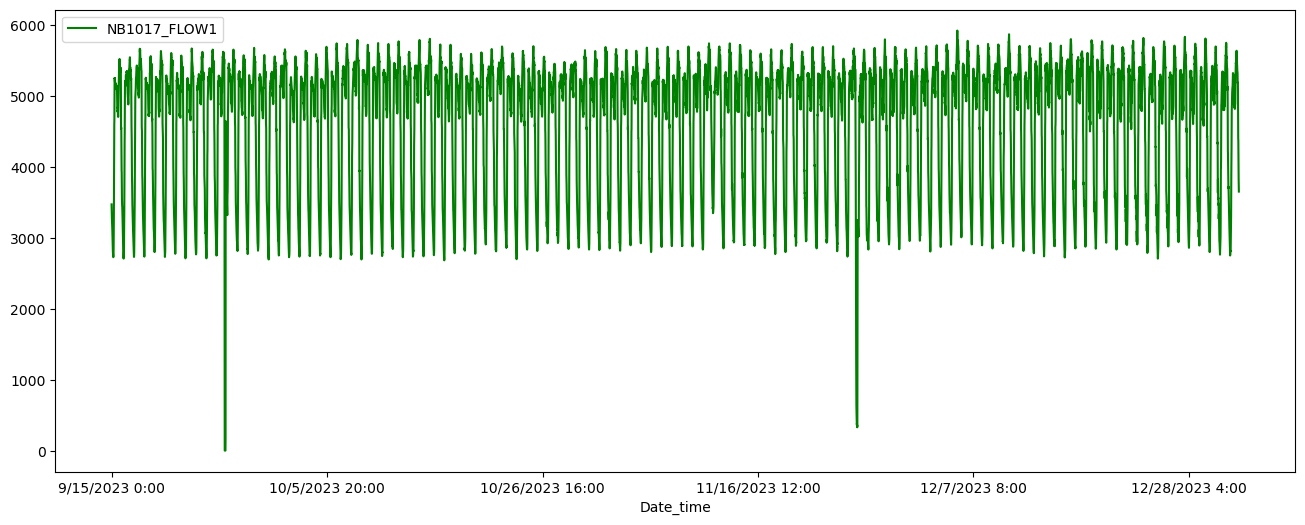

In [37]:
ax = plt.gca()
df_nb1017.plot(kind='line',
        x='Date_time',
        y='NB1017_FLOW1',
        color='green', ax=ax, figsize = (16,6))
print(df_nb1017[df_nb1017['NB1017_FLOW1']<=0])

Empty DataFrame
Columns: [Date_time, NB1017_FLOW1, NB1017_Pressure, NB1019_FLOW1]
Index: []


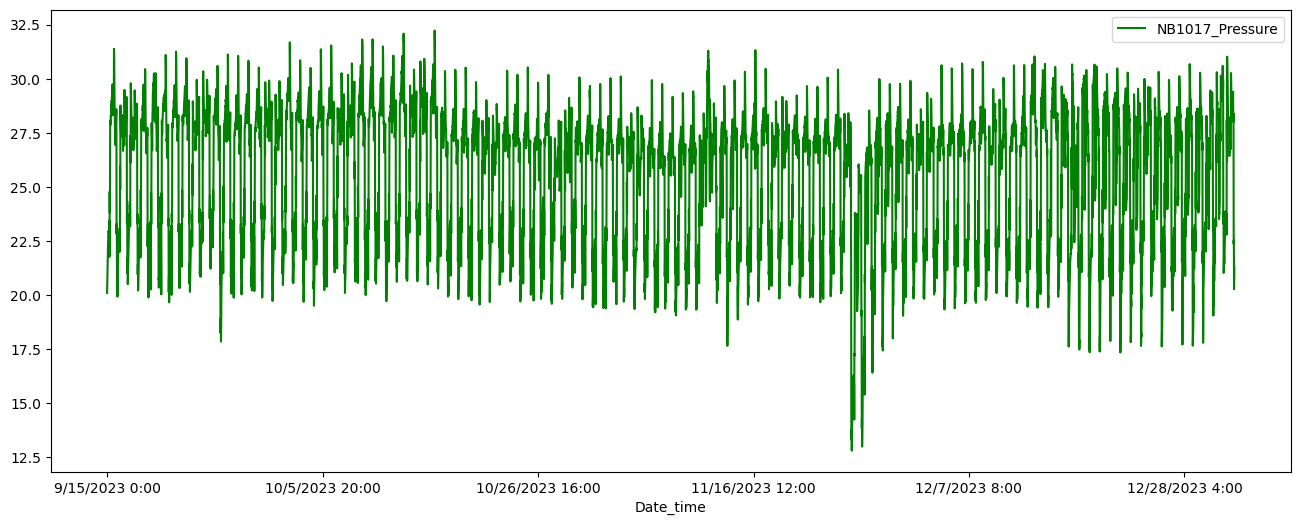

In [38]:
ax = plt.gca()
df_nb1017.plot(kind='line',
        x='Date_time',
        y='NB1017_Pressure',
        color='green', ax=ax, figsize = (16,6))
print(df_nb1017[df_nb1017['NB1017_Pressure']<=0])

In [39]:
'''Nhận xét: tại NB1017 việc mất dữ liệu flow tại 2 khung thời gian và việc press tụt xuống âm có thể
liên quan tới nhau, giữ nguyên đặc điểm này nhưng dịch press lên giá trị dương'''

'Nhận xét: tại NB1017 việc mất dữ liệu flow tại 2 khung thời gian và việc press tụt xuống âm có thể\nliên quan tới nhau, giữ nguyên đặc điểm này nhưng dịch press lên giá trị dương'

            Date_time  NB1017_FLOW1  NB1017_Pressure  NB1019_FLOW1
6922  11/26/2023 2:30           364        15.805927           0.0
6923  11/26/2023 2:45          1424        15.959927           0.0
8752  12/15/2023 4:00          2892        23.396000           0.0
8753  12/15/2023 4:15          2880        23.292000           0.0
8754  12/15/2023 4:30          2932        23.140000           0.0
8755  12/15/2023 4:45          3092        23.675000           0.0
8756  12/15/2023 5:00          3276        23.934000           0.0
8757  12/15/2023 5:15          3368        23.453000           0.0
8758  12/15/2023 5:30          3564        22.689000           0.0
8759  12/15/2023 5:45          4084        23.673000           0.0


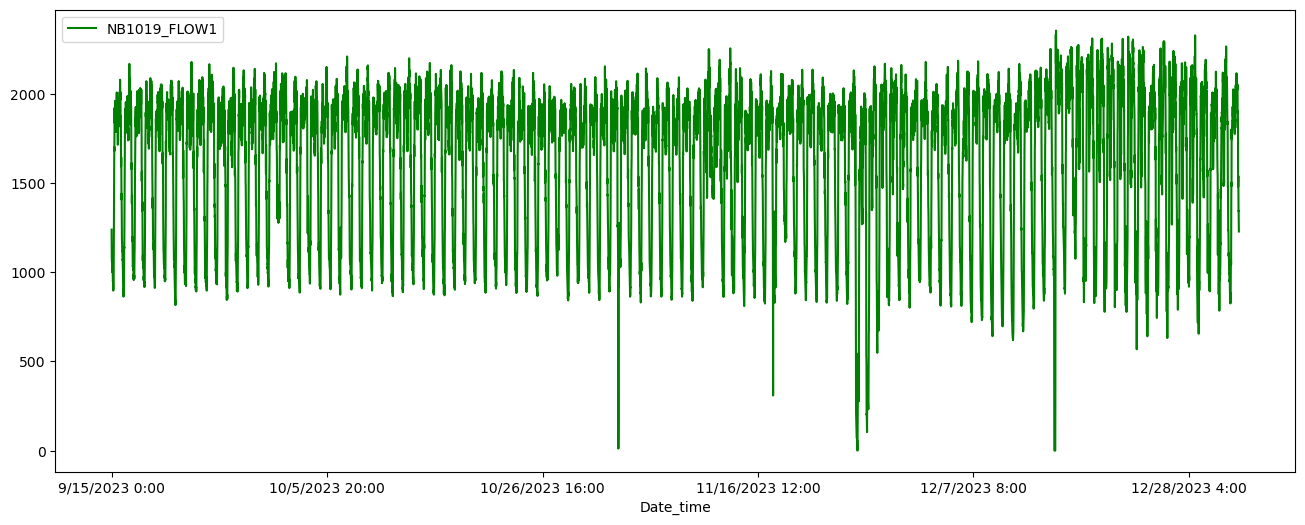

In [40]:
ax = plt.gca()
df_nb1017.plot(kind='line',
        x='Date_time',
        y='NB1019_FLOW1',
        color='green', ax=ax, figsize = (16,6))
print(df_nb1017[df_nb1017['NB1019_FLOW1']<=0])

In [41]:
df_nb1019 = pd.read_csv("nb1019.csv")
df_nb1019.describe()

NB1019_FLOW1  NB1019_Pressure  NB1020_FLOW1  NB1020_FLOW2  \
count  10464.000000     10464.000000  10464.000000       10464.0   
mean    1635.502523        21.027778    463.360474           0.0   
std      417.976069         2.003464    104.588792           0.0   
min        0.000000        10.763000      0.000000           0.0   
25%     1273.900000        20.045750    366.000000           0.0   
50%     1818.400000        21.326000    496.800000           0.0   
75%     1941.200000        22.348250    545.600000           0.0   
max     2355.200000        28.700000    730.400000           0.0   

       NB1020_Pressure  NB1021_FLOW2  NB1021_Pressure  
count     10464.000000       10464.0          10464.0  
mean         -0.641533           0.0              0.0  
std           0.938692           0.0              0.0  
min         -14.000000           0.0              0.0  
25%          -0.500000           0.0              0.0  
50%          -0.500000           0.0              0.0  
75%          -0.500000           0.0              0.0  
max           0.000000           0.0              0.0

Empty DataFrame
Columns: [Date_time, NB1019_FLOW1, NB1019_Pressure, NB1020_FLOW1, NB1020_FLOW2, NB1020_Pressure, NB1021_FLOW1, NB1021_FLOW2, NB1021_Pressure]
Index: []


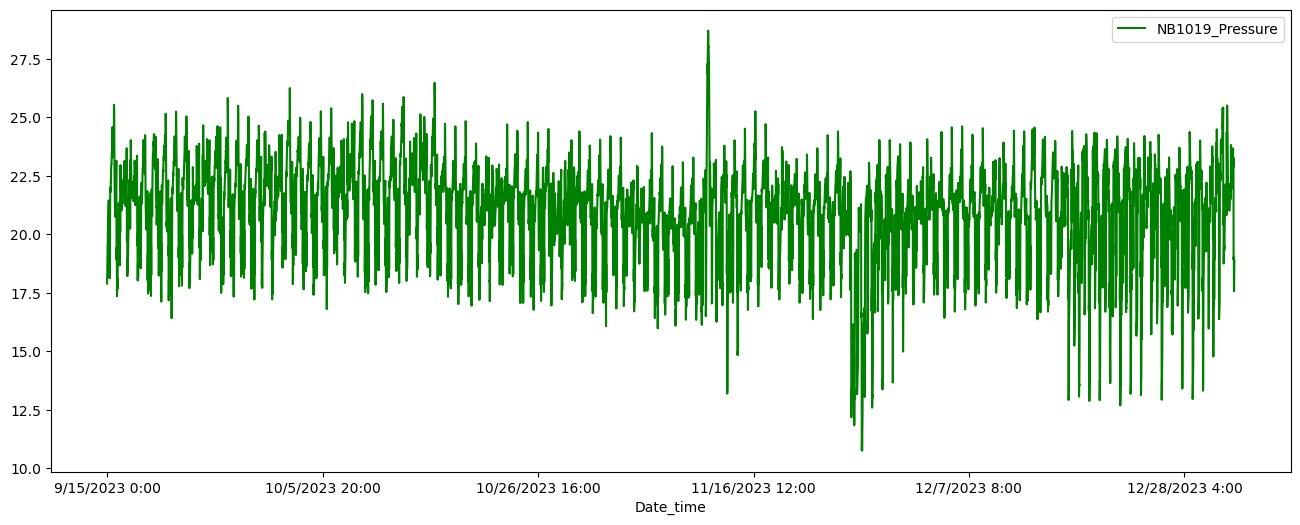

In [42]:
ax = plt.gca()
df_nb1019.plot(kind='line',
        x='Date_time',
        y='NB1019_Pressure',
        color='green', ax=ax, figsize = (16,6))
print(df_nb1019[df_nb1019['NB1019_Pressure']<=0])

            Date_time  NB1019_FLOW1  NB1019_Pressure  NB1020_FLOW1  \
6914  11/26/2023 0:30         103.6          13.6815           0.0   
6916  11/26/2023 1:00          74.4          14.3185           0.0   
6917  11/26/2023 1:15          76.0          14.5495           0.0   
6918  11/26/2023 1:30          64.8          14.7750           0.0   
6919  11/26/2023 1:45          55.2          15.0440           0.0   
6920  11/26/2023 2:00          57.6          15.3165           0.0   
6921  11/26/2023 2:15          48.8          15.5425           0.0   
6922  11/26/2023 2:30           0.0          15.7435           0.0   
6923  11/26/2023 2:45           0.0          15.9385           0.0   

      NB1020_FLOW2  NB1020_Pressure NB1021_FLOW1  NB1021_FLOW2  \
6914             0             -0.5          172             0   
6916             0             -0.5          128             0   
6917             0             -0.5          108             0   
6918             0             -0.5

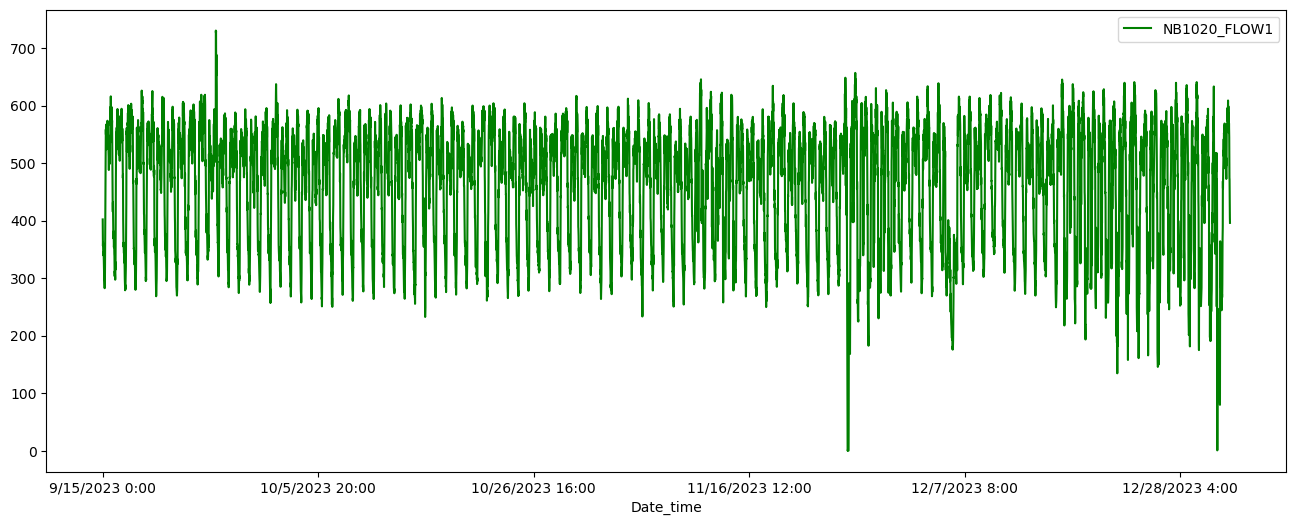

In [43]:
ax = plt.gca()
df_nb1019.plot(kind='line',
        x='Date_time',
        y='NB1020_FLOW1',
        color='green', ax=ax, figsize = (16,6))
print(df_nb1019[df_nb1019['NB1020_FLOW1']<=0])

            Date_time  NB1019_FLOW1  NB1019_Pressure  NB1020_FLOW1  \
0      9/15/2023 0:00        1239.2           17.894         402.0   
1      9/15/2023 0:15        1118.4           18.245         370.0   
2      9/15/2023 0:30        1082.8           18.620         356.0   
3      9/15/2023 0:45        1056.8           18.841         361.6   
4      9/15/2023 1:00        1058.4           19.191         352.0   
...               ...           ...              ...           ...   
10459  1/1/2024 22:45        1422.4           18.178         472.0   
10460  1/1/2024 23:00        1342.4           17.571         450.8   
10461  1/1/2024 23:15        1344.8           17.899         405.6   
10462  1/1/2024 23:30        1240.4           18.421         404.8   
10463  1/1/2024 23:45        1228.4           18.879         396.0   

       NB1020_FLOW2  NB1020_Pressure NB1021_FLOW1  NB1021_FLOW2  \
0                 0             -0.5         1672             0   
1                 0      

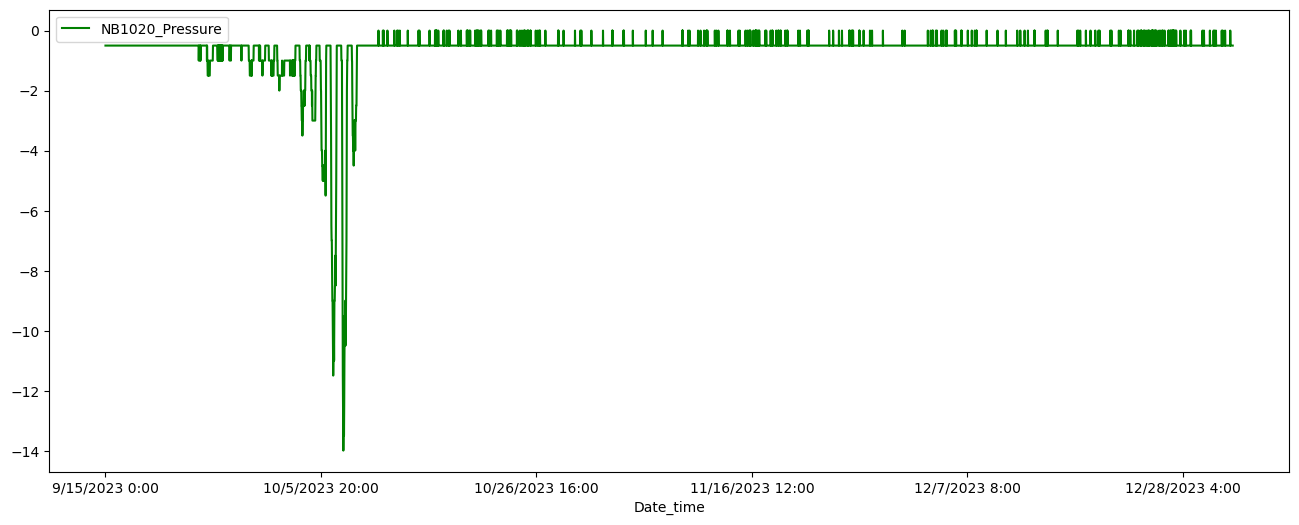

In [44]:
ax = plt.gca()
df_nb1019.plot(kind='line',
        x='Date_time',
        y='NB1020_Pressure',
        color='green', ax=ax, figsize = (16,6))
print(df_nb1019[df_nb1019['NB1020_Pressure']<=0])

In [45]:

df_nb1019['NB1021_FLOW1'] = pd.to_numeric(df_nb1019['NB1021_FLOW1'], errors = 'coerce')
print(df_nb1019['NB1021_FLOW1'].describe())
print(df_nb1019['NB1021_FLOW1'].isnull().sum())

count    10232.000000
mean      2224.991009
std        515.419585
min         40.000000
25%       1836.000000
50%       2368.000000
75%       2552.000000
max       4096.000000
Name: NB1021_FLOW1, dtype: float64
232


Empty DataFrame
Columns: [Date_time, NB1019_FLOW1, NB1019_Pressure, NB1020_FLOW1, NB1020_FLOW2, NB1020_Pressure, NB1021_FLOW1, NB1021_FLOW2, NB1021_Pressure]
Index: []


' giống trường hợp của bo1013 :// '

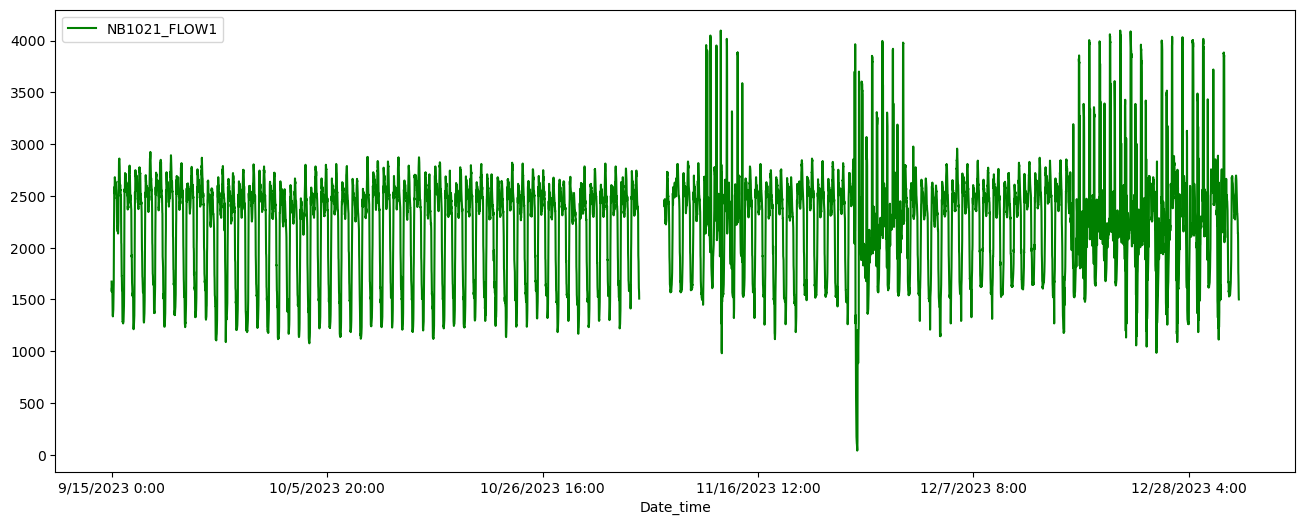

In [46]:
ax = plt.gca()
df_nb1019.plot(kind='line',
        x='Date_time',
        y='NB1021_FLOW1',
        color='green', ax=ax, figsize = (16,6))
print(df_nb1019[df_nb1019['NB1021_FLOW1']<=0])
''' giống trường hợp của bo1013 :// '''

In [47]:
df_nb1022 = pd.read_csv("nb1022.csv")
df_nb1022.describe()

NB1022_FLOW1  TD1029_flow1  TD1029_Pressure  TD1043_FLOW1  \
count  10464.000000  10464.000000     10464.000000  10464.000000   
mean     709.572898    371.405849        28.082099    966.597286   
std      228.019936    164.914015         8.431778    565.160088   
min        0.000000      0.000000         8.340000      0.000000   
25%      489.100000    246.000000        17.134000    482.400000   
50%      787.600000    360.400000        31.966000   1139.600000   
75%      885.200000    484.800000        34.855000   1441.600000   
max     1224.000000    893.200000        39.554000   1915.200000   

       TD1043_Press(m)  TD1044_flow1  TD1044_press  NMNBOOTM1_FLOW1  \
count     10464.000000  10367.000000  10367.000000     10464.000000   
mean         35.113532     70.101206     19.165525     12493.394751   
std           7.079430    146.405450     11.067399      2877.066060   
min           0.000000      0.000000     -4.000000         0.000000   
25%          27.000000      0.000000     11.500000      9840.001000   
50%          38.500000      0.000000     16.500000     13560.000000   
75%          41.000000     10.900000     18.500000     14800.000000   
max          45.500000    541.200000     48.500000     16480.000000   

       BOO_TM2_Pressure  BOO_TM2_flow1  NB1021_FLOW1  Unnamed: 12  \
count      10464.000000   10464.000000  10464.000000    96.000000   
mean          12.846637   12360.833333   2221.482034  2225.791667   
std            0.261680    2846.430065    514.698097   419.598954   
min           12.459000       0.000000     40.000000  1412.000000   
25%           12.655000    9720.000000   1828.000000  1738.000000   
50%           12.733000   13440.000000   2368.000000  2372.000000   
75%           12.999000   14640.000000   2552.000000  2565.000000   
max           13.704000   16320.000000   4096.000000  2744.000000   

       Unnamed: 13  Unnamed: 14  Unnamed: 15  
count    96.000000    96.000000    57.000000  
mean   2197.833333  2211.812500    42.673814  
std     463.339972   438.395839    46.777715  
min    1220.000000  1366.000000   -32.000000  
25%    1819.000000  1780.500000     2.000000  
50%    2388.000000  2387.000000    30.000000  
75%    2516.000000  2547.000000    80.000000  
max    2764.000000  2748.000000   146.000000

             Date_time  NB1022_FLOW1  TD1029_flow1  TD1029_Pressure  \
8901  12/16/2023 17:15           0.0         656.8           37.471   

      TD1043_FLOW1  TD1043_Press(m)  TD1044_flow1  TD1044_press  \
8901        1649.6             43.5           0.0          10.5   

      NMNBOOTM1_FLOW1  BOO_TM2_Pressure  BOO_TM2_flow1  NB1021_FLOW1  \
8901          15920.0            12.952          15720          2244   

      Unnamed: 12  Unnamed: 13  Unnamed: 14  Unnamed: 15  
8901          NaN          NaN          NaN          NaN  


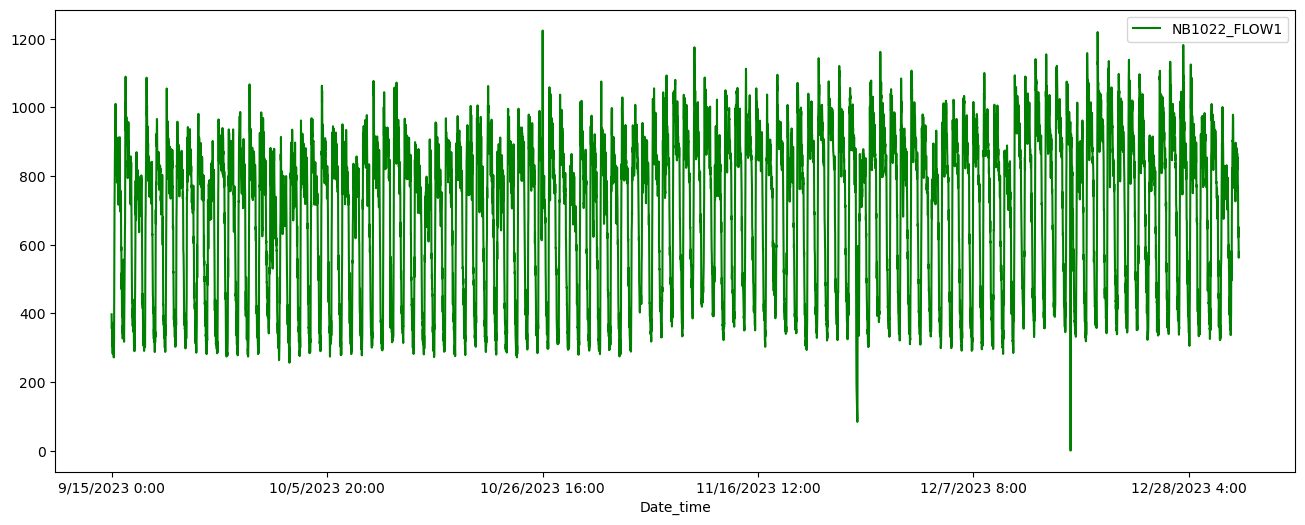

In [48]:
ax = plt.gca()
df_nb1022.plot(kind='line',
        x='Date_time',
        y='NB1022_FLOW1',
        color='green', ax=ax, figsize = (16,6))
print(df_nb1022[df_nb1022['NB1022_FLOW1']<=0])

            Date_time  NB1022_FLOW1  TD1029_flow1  TD1029_Pressure  \
6916  11/26/2023 1:00         155.6           0.0            9.413   
6917  11/26/2023 1:15         140.0           0.0            9.460   
6918  11/26/2023 1:30         126.0           0.0            9.413   
6919  11/26/2023 1:45         117.2           0.0            9.413   
6920  11/26/2023 2:00         106.0           0.0            9.405   
6921  11/26/2023 2:15          94.8           0.0            9.405   
6922  11/26/2023 2:30          83.6           0.0            9.397   

      TD1043_FLOW1  TD1043_Press(m)  TD1044_flow1  TD1044_press  \
6916           0.0             27.0           0.0         13.00   
6917           2.0             28.0           0.0         12.75   
6918           0.0             28.0           0.0         12.50   
6919           0.0             28.0           0.0         12.50   
6920           0.0             28.5           0.0         12.50   
6921          11.2             29.0  

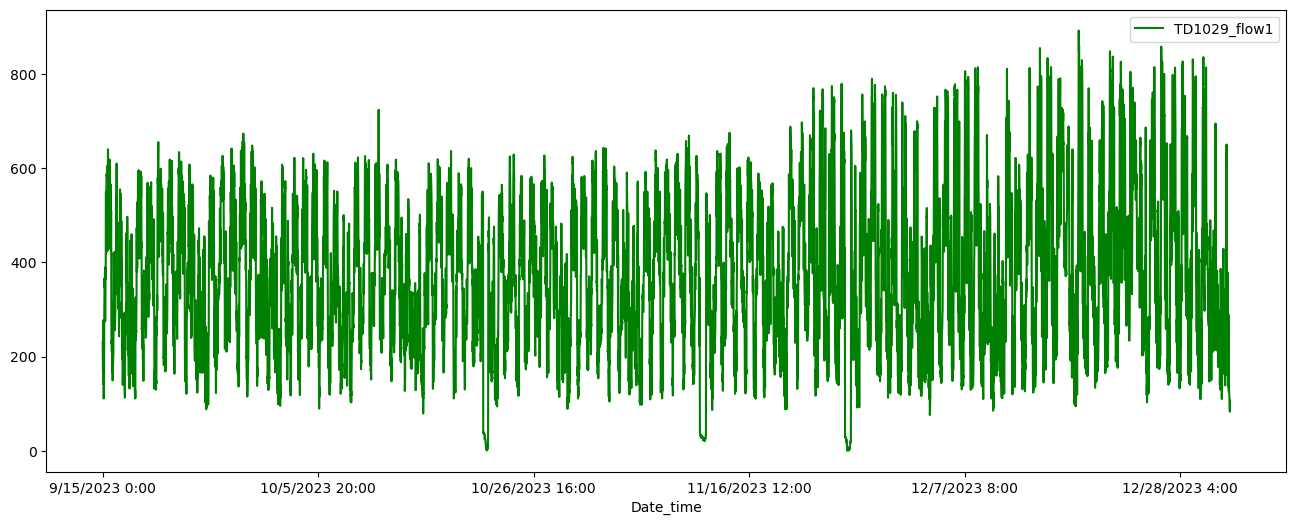

In [49]:
ax = plt.gca()
df_nb1022.plot(kind='line',
        x='Date_time',
        y='TD1029_flow1',
        color='green', ax=ax, figsize = (16,6))
print(df_nb1022[df_nb1022['TD1029_flow1']<=0])

Empty DataFrame
Columns: [Date_time, NB1022_FLOW1, TD1029_flow1, TD1029_Pressure, TD1043_FLOW1, TD1043_Press(m), TD1044_flow1, TD1044_press, NMNBOOTM1_FLOW1, BOO_TM2_Pressure, BOO_TM2_flow1, NB1021_FLOW1, Unnamed: 12, Unnamed: 13, Unnamed: 14, Unnamed: 15]
Index: []


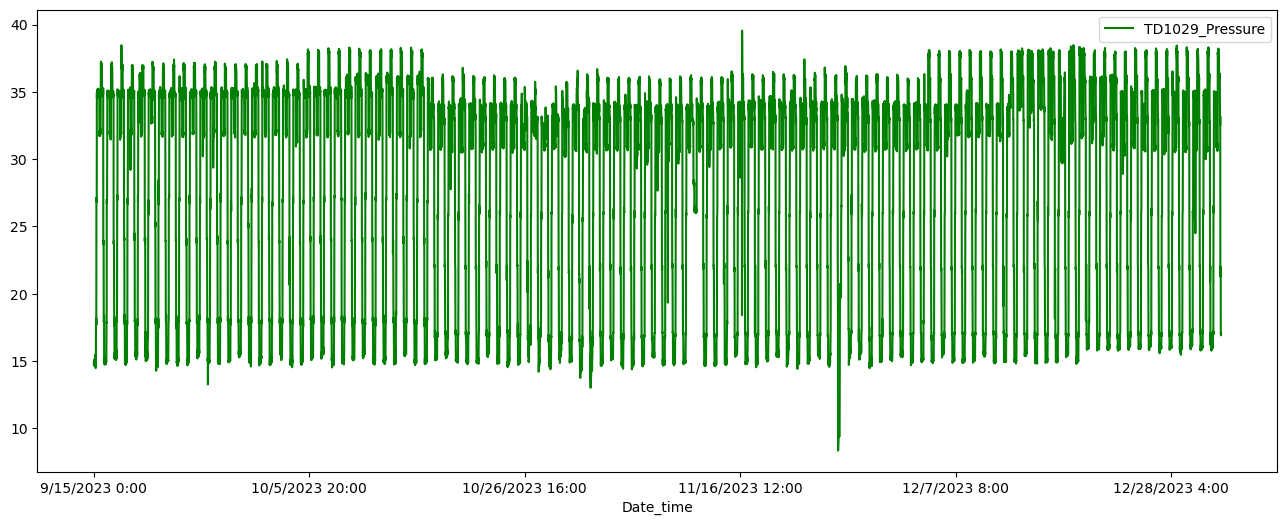

In [50]:
ax = plt.gca()
df_nb1022.plot(kind='line',
        x='Date_time',
        y='TD1029_Pressure',
        color='green', ax=ax, figsize = (16,6))
print(df_nb1022[df_nb1022['TD1029_Pressure']<=0])

             Date_time  NB1022_FLOW1  TD1029_flow1  TD1029_Pressure  \
5850  11/14/2023 22:30         644.4         402.8           21.895   
5851  11/14/2023 22:45         681.2         414.8           21.903   
5852  11/14/2023 23:00         655.2         391.2           22.287   
5855  11/14/2023 23:45         479.6         362.4           17.110   
5856   11/15/2023 0:00         513.6         252.8           15.043   
...                ...           ...           ...              ...   
7468   12/1/2023 19:00         865.2         368.8           34.346   
7470   12/1/2023 19:30         818.8         354.8           33.955   
7478   12/1/2023 21:30         868.8         208.0           32.890   
7479   12/1/2023 21:45         837.6         188.0           33.046   
7480   12/1/2023 22:00         816.8         144.4           22.232   

      TD1043_FLOW1  TD1043_Press(m)  TD1044_flow1  TD1044_press  \
5850           0.0              1.5           0.0         16.50   
5851         

'mất dữ liệu rất nhiều :vvv , dạng dữ liệu gửi về dao động khoảng 0'

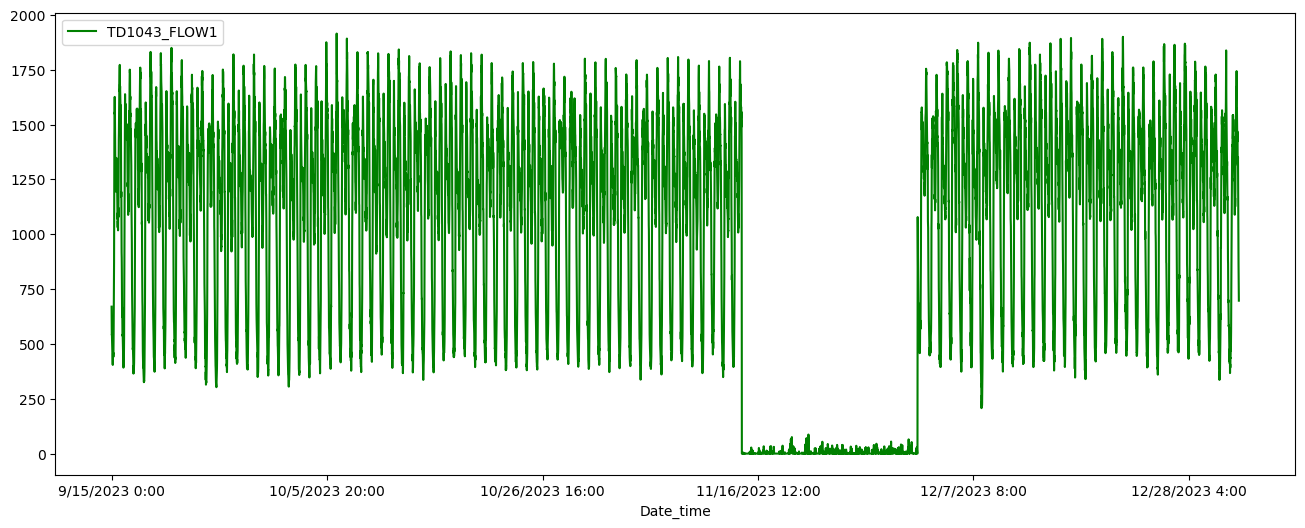

In [51]:
ax = plt.gca()
df_nb1022.plot(kind='line',
        x='Date_time',
        y='TD1043_FLOW1',
        color='green', ax=ax, figsize = (16,6))
print(df_nb1022[df_nb1022['TD1043_FLOW1']<=0])
'''mất dữ liệu rất nhiều :vvv , dạng dữ liệu gửi về dao động khoảng 0'''

             Date_time  NB1022_FLOW1  TD1029_flow1  TD1029_Pressure  \
8540  12/12/2023 23:00         717.2         154.0           21.981   
8541  12/12/2023 23:15         749.6         147.6           21.966   

      TD1043_FLOW1  TD1043_Press(m)  TD1044_flow1  TD1044_press  \
8540        1072.4              0.0           0.0         10.00   
8541        1015.2              0.0           0.0         10.25   

      NMNBOOTM1_FLOW1  BOO_TM2_Pressure  BOO_TM2_flow1  NB1021_FLOW1  \
8540          11720.0            12.662          11560          1960   
8541          11480.0            12.662          11360          1928   

      Unnamed: 12  Unnamed: 13  Unnamed: 14  Unnamed: 15  
8540          NaN          NaN          NaN          NaN  
8541          NaN          NaN          NaN          NaN  


'có liên hệ flow - press tạm thời bỏ qua :v'

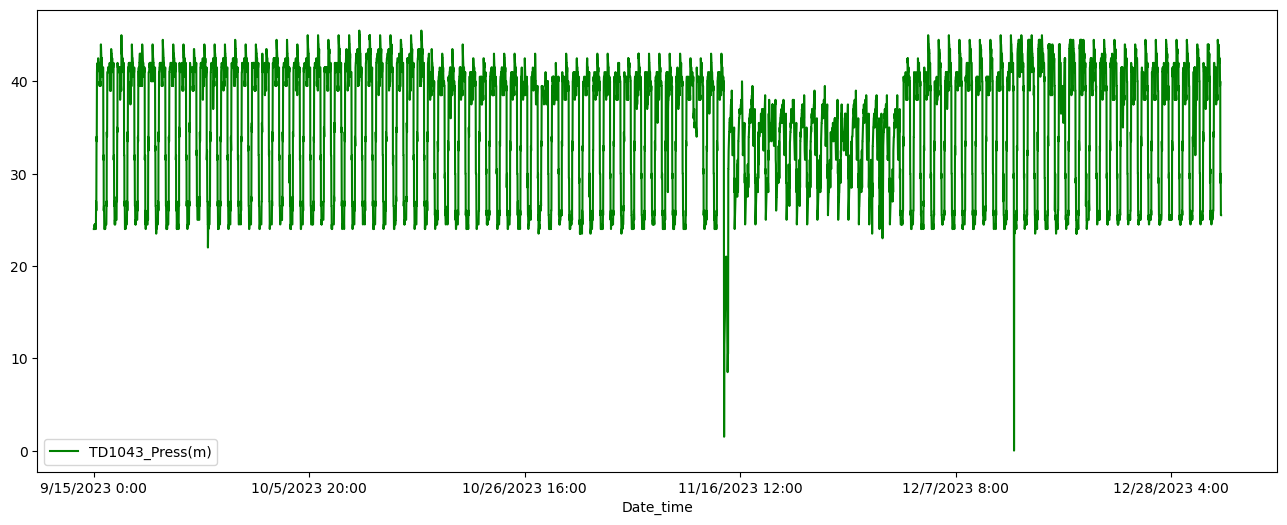

In [52]:
ax = plt.gca()
df_nb1022.plot(kind='line',
        x='Date_time',
        y='TD1043_Press(m)',
        color='green', ax=ax, figsize = (16,6))
print(df_nb1022[df_nb1022['TD1043_Press(m)']<=0])
'''có liên hệ flow - press tạm thời bỏ qua :v'''

              Date_time  NB1022_FLOW1  TD1029_flow1  TD1029_Pressure  \
576      9/21/2023 0:00         412.4         287.2           15.059   
577      9/21/2023 0:15         392.4         282.0           15.051   
578      9/21/2023 0:30         380.4         316.4           15.012   
3406   10/20/2023 11:30         907.6         444.0           34.143   
3407   10/20/2023 11:45         883.6         474.8           34.542   
...                 ...           ...           ...              ...   
10362  12/31/2023 22:30         728.0         266.0           22.005   
10363  12/31/2023 22:45         722.0         287.2           22.060   
10364  12/31/2023 23:00         702.4         290.4           16.210   
10365  12/31/2023 23:15         623.6         298.0           17.103   
10366  12/31/2023 23:30         615.6         266.8           16.977   

       TD1043_FLOW1  TD1043_Press(m)  TD1044_flow1  TD1044_press  \
576           744.4             24.0           0.0         30.00   

'có vẻ điểm này bị loại bỏ, thời điểm hiện tại ko nhận dữ liệu'

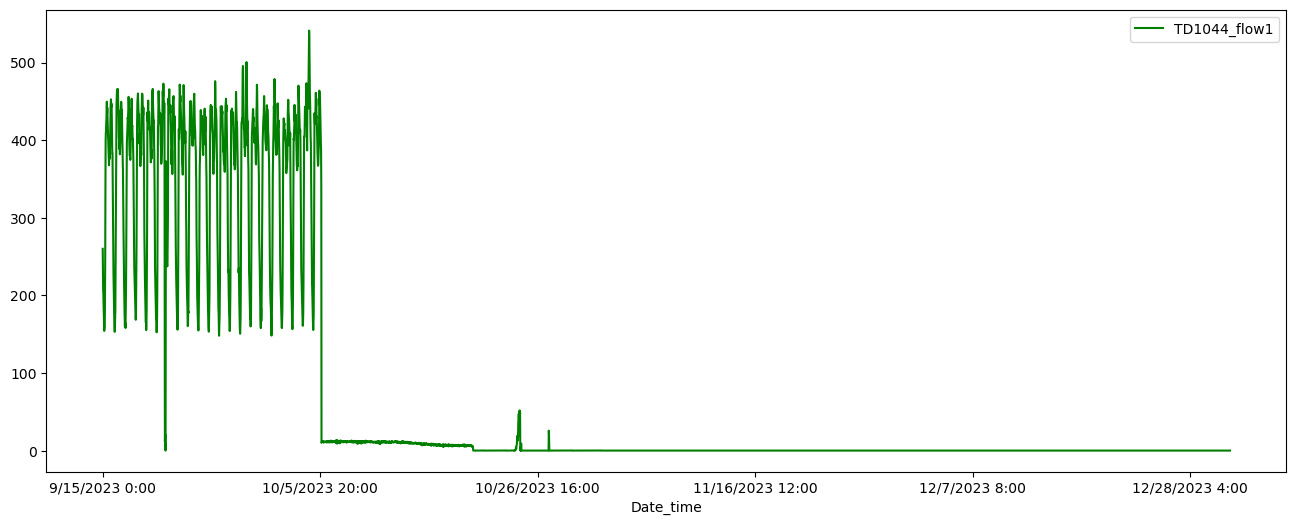

In [53]:
ax = plt.gca()
df_nb1022.plot(kind='line',
        x='Date_time',
        y='TD1044_flow1',
        color='green', ax=ax, figsize = (16,6))
print(df_nb1022[df_nb1022['TD1044_flow1']<=0])
'''có vẻ điểm này bị loại bỏ, thời điểm hiện tại ko nhận dữ liệu'''

             Date_time  NB1022_FLOW1  TD1029_flow1  TD1029_Pressure  \
578     9/21/2023 0:30         380.4         316.4           15.012   
579     9/21/2023 0:45         393.2         327.2           14.268   
580     9/21/2023 1:00         382.0         190.0           15.161   
581     9/21/2023 1:15         368.0         168.4           14.785   
582     9/21/2023 1:30         371.2         180.8           14.980   
4078  10/27/2023 11:30         918.4         565.2           34.103   

      TD1043_FLOW1  TD1043_Press(m)  TD1044_flow1  TD1044_press  \
578          621.2             24.0           0.0          -4.0   
579          599.6             23.5         145.2          -4.0   
580          596.8             24.0         290.4          -4.0   
581          572.8             24.5         331.6          -4.0   
582          564.8             24.0         372.8          -4.0   
4078        1236.0             41.0           0.0           0.0   

      NMNBOOTM1_FLOW1  BOO_TM2_P

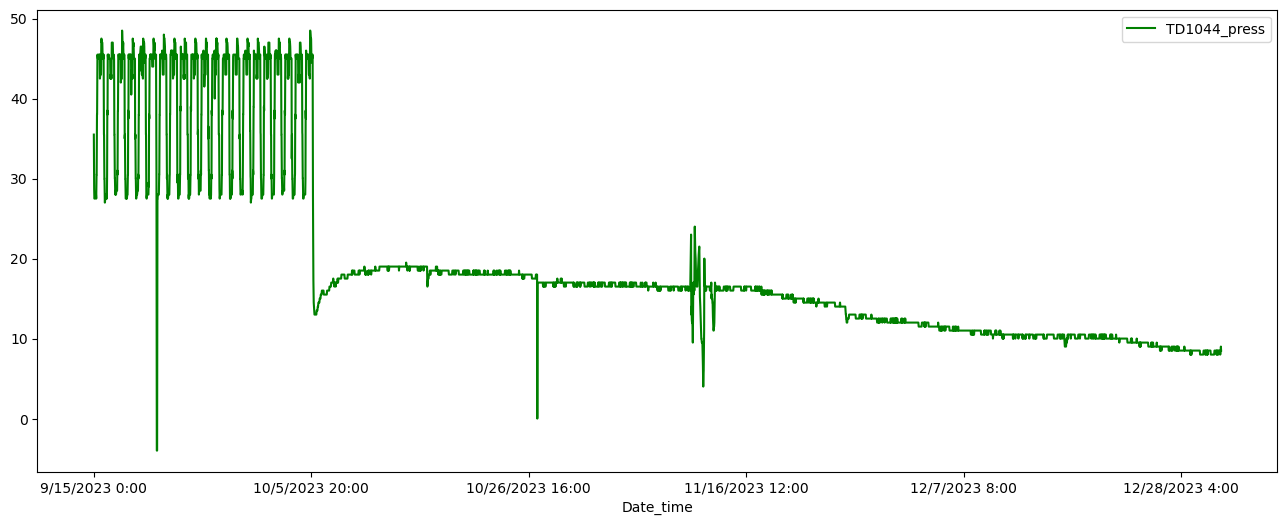

In [54]:
ax = plt.gca()
df_nb1022.plot(kind='line',
        x='Date_time',
        y='TD1044_press',
        color='green', ax=ax, figsize = (16,6))
print(df_nb1022[df_nb1022['TD1044_press']<=0])

             Date_time  NB1022_FLOW1  TD1029_flow1  TD1029_Pressure  \
6909  11/25/2023 23:15         596.4           4.4            8.590   
6910  11/25/2023 23:30         490.4           3.6            8.872   
6911  11/25/2023 23:45         373.6           0.4            9.068   
6912   11/26/2023 0:00         307.6           1.6            9.303   
6913   11/26/2023 0:15         232.0           1.6            9.397   
6914   11/26/2023 0:30         189.6           0.4            9.444   
6915   11/26/2023 0:45         174.0           0.4            9.491   
6916   11/26/2023 1:00         155.6           0.0            9.413   
6917   11/26/2023 1:15         140.0           0.0            9.460   
6918   11/26/2023 1:30         126.0           0.0            9.413   
6919   11/26/2023 1:45         117.2           0.0            9.413   
6920   11/26/2023 2:00         106.0           0.0            9.405   
6921   11/26/2023 2:15          94.8           0.0            9.405   
6922  

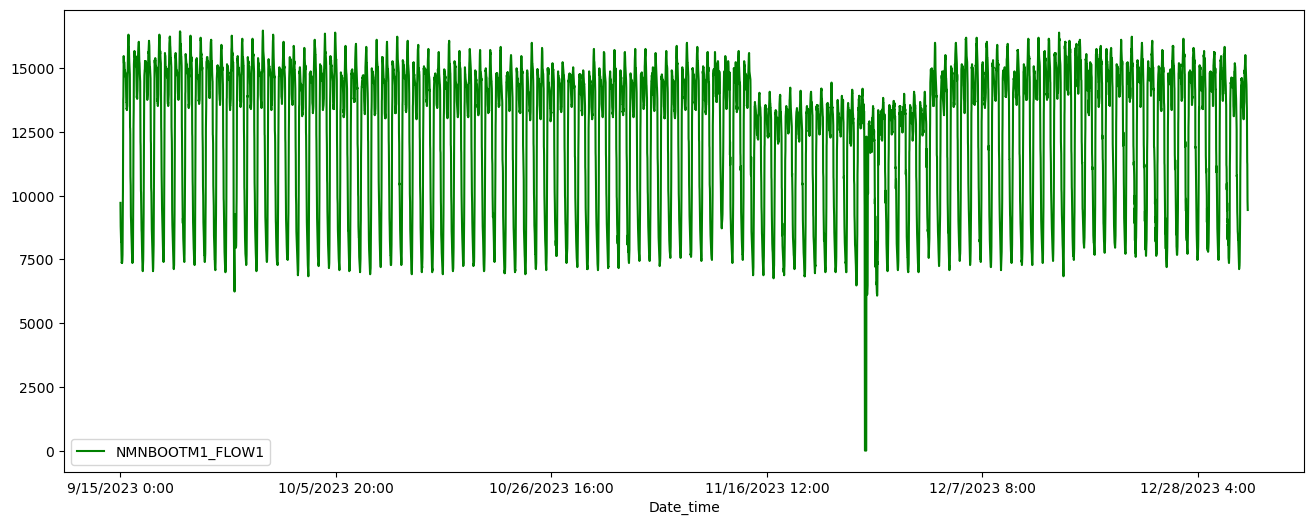

In [55]:
ax = plt.gca()
df_nb1022.plot(kind='line',
        x='Date_time',
        y='NMNBOOTM1_FLOW1',
        color='green', ax=ax, figsize = (16,6))
print(df_nb1022[df_nb1022['NMNBOOTM1_FLOW1']<=0])

             Date_time  NB1022_FLOW1  TD1029_flow1  TD1029_Pressure  \
6909  11/25/2023 23:15         596.4           4.4            8.590   
6910  11/25/2023 23:30         490.4           3.6            8.872   
6911  11/25/2023 23:45         373.6           0.4            9.068   
6912   11/26/2023 0:00         307.6           1.6            9.303   
6913   11/26/2023 0:15         232.0           1.6            9.397   
6914   11/26/2023 0:30         189.6           0.4            9.444   
6915   11/26/2023 0:45         174.0           0.4            9.491   
6916   11/26/2023 1:00         155.6           0.0            9.413   
6917   11/26/2023 1:15         140.0           0.0            9.460   
6918   11/26/2023 1:30         126.0           0.0            9.413   
6919   11/26/2023 1:45         117.2           0.0            9.413   
6920   11/26/2023 2:00         106.0           0.0            9.405   
6921   11/26/2023 2:15          94.8           0.0            9.405   
6922  

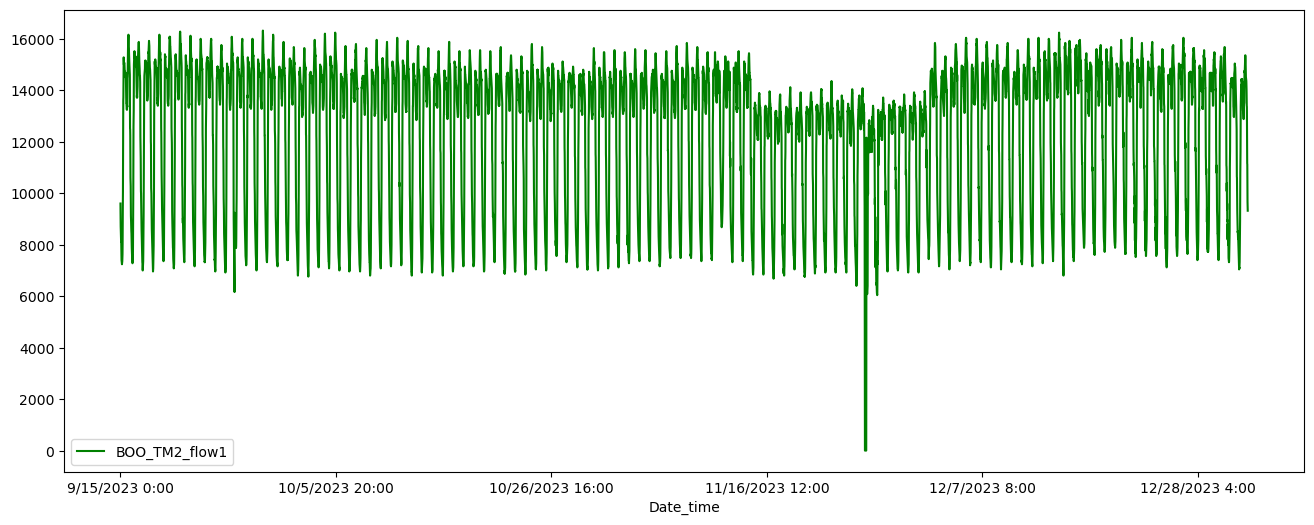

In [56]:
ax = plt.gca()
df_nb1022.plot(kind='line',
        x='Date_time',
        y='BOO_TM2_flow1',
        color='green', ax=ax, figsize = (16,6))
print(df_nb1022[df_nb1022['BOO_TM2_flow1']<=0])

In [57]:
df_all = pd.read_csv("ALL.csv")
df_all.describe()
# print(df_all.columns)

BO1013_FLOW1  BO1016_Pressure(m)  BO1017_Pressure(m)  BO1021_FLOW1)  \
count  10464.000000        10464.000000        10464.000000   10464.000000   
mean     897.105848           29.012682           25.593451    2236.229687   
std      221.774698            4.346007            3.086398     517.735759   
min       70.800000           -1.693000           13.120000      46.400000   
25%      686.000000           24.274750           22.748750    1843.400000   
50%      978.000000           31.115000           26.837000    2382.000000   
75%     1070.400000           32.329250           27.975000    2566.800000   
max     1240.400000           36.489000           32.228000    4124.000000   

       BO1021_Pressure  BO1022_flow1  BO1022_Pressure(m)  BO1017_FLOW1  \
count     10464.000000  10464.000000        10464.000000  10464.000000   
mean         12.960688    696.098203           23.868620   4602.711391   
std           0.213245    225.214997            2.508309    951.762711   
min          12.529000     82.000000           -0.556000      0.000000   
25%          12.796000    478.000000           22.240000   3752.000000   
50%          12.921000    772.400000           24.448000   4972.000000   
75%          13.093000    869.600000           25.607000   5332.000000   
max          13.712000   1218.000000           30.963000   6044.000000   

       BO1029_FLOW1  BO1029_Pressure(m)  ...  NB1019_Pressure  NB1020_FLOW1  \
count  10464.000000        10464.000000  ...     10464.000000  10464.000000   
mean     374.846713           27.558013  ...        20.985139    463.360474   
std      166.142653            8.380472  ...         2.258927    104.588792   
min        0.000000            7.897000  ...        -4.220000      0.000000   
25%      248.800000           16.602250  ...        20.044750    366.000000   
50%      364.000000           31.429000  ...        21.326000    496.800000   
75%      488.800000           34.313000  ...        22.348250    545.600000   
max      899.600000           37.749000  ...        28.700000    730.400000   

       NB1021_FLOW1  NB1022_FLOW1  TD1029_flow1  TD1029_Pressure  \
count  10464.000000  10464.000000  10464.000000     10464.000000   
mean    2221.482034    709.572898    371.405849        28.082099   
std      514.698097    228.019936    164.914015         8.431778   
min       40.000000      0.000000      0.000000         8.340000   
25%     1828.000000    489.100000    246.000000        17.134000   
50%     2368.000000    787.600000    360.400000        31.966000   
75%     2552.000000    885.200000    484.800000        34.855000   
max     4096.000000   1224.000000    893.200000        39.554000   

       TD1043_FLOW1  TD1043_Press(m)  NMNBOOTM1_FLOW1  BOO_TM2_Pressure  
count  10464.000000     10464.000000     10464.000000      10464.000000  
mean     966.597286        35.113532     12493.394751         12.846637  
std      565.160088         7.079430      2877.066060          0.261680  
min        0.000000         0.000000         0.000000         12.459000  
25%      482.400000        27.000000      9840.001000         12.655000  
50%     1139.600000        38.500000     13560.000000         12.733000  
75%     1441.600000        41.000000     14800.000000         12.999000  
max     1915.200000        45.500000     16480.000000         13.704000  

[8 rows x 24 columns]

In [58]:
colum_press = ['BO1016_Pressure(m)', 'BO1017_Pressure(m)', 'BO1021_Pressure', 'BO1022_Pressure(m)', 'BO1029_Pressure(m)', 'NB1019_Pressure', 'TD1029_Pressure', 'TD1043_Press(m)']
df_all[colum_press] = df_all[colum_press].apply(lambda x:x+5)

In [59]:
df_all.describe()

BO1013_FLOW1  BO1016_Pressure(m)  BO1017_Pressure(m)  BO1021_FLOW1)  \
count  10464.000000        10464.000000        10464.000000   10464.000000   
mean     897.105848           34.012682           30.593451    2236.229687   
std      221.774698            4.346007            3.086398     517.735759   
min       70.800000            3.307000           18.120000      46.400000   
25%      686.000000           29.274750           27.748750    1843.400000   
50%      978.000000           36.115000           31.837000    2382.000000   
75%     1070.400000           37.329250           32.975000    2566.800000   
max     1240.400000           41.489000           37.228000    4124.000000   

       BO1021_Pressure  BO1022_flow1  BO1022_Pressure(m)  BO1017_FLOW1  \
count     10464.000000  10464.000000        10464.000000  10464.000000   
mean         17.960688    696.098203           28.868620   4602.711391   
std           0.213245    225.214997            2.508309    951.762711   
min          17.529000     82.000000            4.444000      0.000000   
25%          17.796000    478.000000           27.240000   3752.000000   
50%          17.921000    772.400000           29.448000   4972.000000   
75%          18.093000    869.600000           30.607000   5332.000000   
max          18.712000   1218.000000           35.963000   6044.000000   

       BO1029_FLOW1  BO1029_Pressure(m)  ...  NB1019_Pressure  NB1020_FLOW1  \
count  10464.000000        10464.000000  ...     10464.000000  10464.000000   
mean     374.846713           32.558013  ...        25.985139    463.360474   
std      166.142653            8.380472  ...         2.258927    104.588792   
min        0.000000           12.897000  ...         0.780000      0.000000   
25%      248.800000           21.602250  ...        25.044750    366.000000   
50%      364.000000           36.429000  ...        26.326000    496.800000   
75%      488.800000           39.313000  ...        27.348250    545.600000   
max      899.600000           42.749000  ...        33.700000    730.400000   

       NB1021_FLOW1  NB1022_FLOW1  TD1029_flow1  TD1029_Pressure  \
count  10464.000000  10464.000000  10464.000000     10464.000000   
mean    2221.482034    709.572898    371.405849        33.082099   
std      514.698097    228.019936    164.914015         8.431778   
min       40.000000      0.000000      0.000000        13.340000   
25%     1828.000000    489.100000    246.000000        22.134000   
50%     2368.000000    787.600000    360.400000        36.966000   
75%     2552.000000    885.200000    484.800000        39.855000   
max     4096.000000   1224.000000    893.200000        44.554000   

       TD1043_FLOW1  TD1043_Press(m)  NMNBOOTM1_FLOW1  BOO_TM2_Pressure  
count  10464.000000     10464.000000     10464.000000      10464.000000  
mean     966.597286        40.113532     12493.394751         12.846637  
std      565.160088         7.079430      2877.066060          0.261680  
min        0.000000         5.000000         0.000000         12.459000  
25%      482.400000        32.000000      9840.001000         12.655000  
50%     1139.600000        43.500000     13560.000000         12.733000  
75%     1441.600000        46.000000     14800.000000         12.999000  
max     1915.200000        50.500000     16480.000000         13.704000  

[8 rows x 24 columns]